<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/09_pytorch_model_deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/09_pytorch_model_deployment.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/09_pytorch_model_deployment.pdf)

# 09. PyTorch 模型部署

欢迎来到里程碑项目 3：PyTorch 模型部署！

我们在 FoodVision Mini 项目中已经取得了很大的进展。

但到目前为止，我们的 PyTorch 模型只是对我们可用。

那我们来让 FoodVision Mini 活起来，并让它公开可访问怎么样？

换句话说，**我们将把我们的 FoodVision Mini 模型部署到互联网上，作为一个可用的应用！**

<img src="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/09-model-deployment-what-were-doing-demo-trimmed-cropped-small.gif" alt="demo of foodvision mini computer vision model being used on a mobile device to predict on an image of sushi and getting it right" width=900/>

*在我的午餐上试用[部署版本的 FoodVision Mini](https://huggingface.co/spaces/mrdbourke/foodvision_mini)（我们将要构建的版本）。模型也正确识别了 🍣！*


## 什么是机器学习模型部署？

**机器学习模型部署**是将你的机器学习模型使其可以被他人或其他系统访问的过程。

"他人"指的是可以以某种方式与您的模型进行交互的人。

例如，某人用智能手机拍摄食物的照片，然后让我们的 FoodVision Mini 模型将其分类为比萨饼、牛排或寿司。

"其他系统"可能是另一个程序、应用程序，甚至是另一个模型，它与您的机器学习模型进行交互。

例如，一个银行数据库可能依赖机器学习模型来预测某笔交易是否存在欺诈行为，然后再进行资金转移。

或者，操作系统可能会根据机器学习模型预测某人在特定时间段内通常使用的电力量，来减少资源消耗。

这些使用场景也可以进行混合搭配。

例如，特斯拉汽车的计算机视觉系统将与汽车的路线规划程序（另一系统）进行交互，然后路线规划程序将从司机（他人）那里获得输入和反馈。

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-what-is-model-deployment-someone-or-something-else.png" width=900 alt="模型部署的两个用例，您的模型可供他人使用，例如某人使用它作为应用的一部分，或者使其可供其他程序或模型使用"/>

*机器学习模型部署涉及使您的模型可以供他人或其他系统使用。例如，某人可能将您的模型作为食物识别应用程序的一部分（如 FoodVision Mini 或 [Nutrify](https://nutrify.app)）。而"其他系统"可能是另一个模型或程序，例如银行系统使用机器学习模型来检测交易是否欺诈。*


## 为什么要部署机器学习模型？

机器学习中一个非常重要的哲学问题是：

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-does-it-exist.jpeg" alt="好奇的恐龙，常被称为哲学迅猛龙，提出了一个问题：如果机器学习模型从未离开过笔记本，它是否存在？" width=300/>
</div>

部署模型和训练模型一样重要。

因为尽管你可以通过在精心制作的测试集上评估模型或可视化其结果来大致了解模型的表现，但你永远无法真正知道它如何运行，直到你将它发布到实际环境中。

让从未使用过你的模型的人与之交互，往往会揭示出你在训练过程中从未想到的边缘案例。

例如，如果有人上传一张*不是*食物的照片给我们的 FoodVision Mini 模型，会发生什么？

一种解决方案是创建另一个模型，先将图像分类为“食物”或“非食物”，然后将目标图像先通过该模型（这就是 [Nutrify](https://nutrify.app) 的做法）。

然后，如果图像是“食物”，它会被传送到我们的 FoodVision Mini 模型，并被分类为比萨饼、牛排或寿司。

如果是“非食物”，则显示一条消息。

但如果这些预测是错误的呢？

那会发生什么？

你可以看到，这些问题可能会不断延续。

因此，这突显了模型部署的重要性：它帮助你发现那些在训练/测试过程中不明显的模型错误。

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-pytorch-workflow-with-deployment.png" alt="添加了模型部署和监控步骤的 PyTorch 工作流程" width=900/>

*我们在[01. PyTorch 工作流程](https://www.learnpytorch.io/01_pytorch_workflow/)中介绍了 PyTorch 的工作流程。但一旦你拥有了一个好的模型，部署是一个很好的下一步。监控涉及查看你的模型在最重要的数据分割上的表现：来自现实世界的数据。有关部署和监控的更多资源，请参见[PyTorch 额外资源](https://www.learnpytorch.io/pytorch_extra_resources/#resources-for-machine-learning-and-deep-learning-engineering).*


## 不同类型的机器学习模型部署

关于机器学习模型部署的不同类型，可以写整本书（许多好的书籍可以在[PyTorch 额外资源](https://www.learnpytorch.io/pytorch_extra_resources/#resources-for-machine-learning-and-deep-learning-engineering)中找到）。

而且这个领域仍在发展，最佳实践也在不断变化。

但我喜欢从以下问题开始：

> "我的机器学习模型最理想的使用场景是什么？"

然后从这个问题出发进行反向思考。

当然，你可能事先并不知道这个问题的答案。但你足够聪明，可以想象出这些情况。

以 FoodVision Mini 为例，我们的理想场景可能是：

* 有人用移动设备拍一张照片（通过应用程序或网页浏览器）。
* 预测结果很快返回。

简单。

所以我们有两个主要标准：

1. 模型应该能在移动设备上运行（这意味着会有一些计算限制）。
2. 模型应该快速做出预测（因为一个慢的应用程序是一个无聊的应用程序）。

当然，根据你的使用场景，要求可能会有所不同。

你可能会注意到，以上两个要点可以进一步细分为另两个问题：

1. **它要去哪里？** - 也就是说，它将存储在哪里？
2. **它如何运作？** - 也就是说，它是立即返回预测结果，还是稍后返回？

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-deployment-questions-to-ask.png" alt="开始部署机器学习模型时，提出一些问题：什么是模型的理想使用场景，然后从那里倒推，问问模型要存储在哪里，以及模型如何运作" width=900/>

*在开始部署机器学习模型时，从问最理想的使用场景开始，然后从那里倒推，问问模型要存储在哪里，再问问模型如何运作，都会很有帮助。*


### 它将存储在哪里？

当你部署机器学习模型时，它将存放在哪里？

这里的主要争论通常是在设备端（也称为边缘/浏览器内）或云端（一个不是真正设备的计算机/服务器，它被用于调用模型的设备）之间。

两者各有优缺点。

| **部署位置**         | **优点**                   | **缺点**                          |
| ---------------- | ------------------------ | ------------------------------- |
| **设备端（边缘/浏览器内）** | 可以非常快（因为数据不需要离开设备）       | 计算能力有限（较大的模型需要更长时间运行）           |
|                  | 保持隐私（因为数据不需要离开设备）        | 存储空间有限（需要较小的模型）                 |
|                  | 有时不需要互联网连接               | 经常需要设备特定的技能                     |
|                  |                          |                                 |
| **云端**           | 几乎无限的计算能力（需要时可以扩展）       | 如果没有正确的扩展限制，成本可能失控              |
|                  | 可以部署一个模型并在任何地方使用（通过 API） | 由于数据需要离开设备且预测需要返回，预测可能会变慢（网络延迟） |
|                  | 可以与现有的云生态系统连接            | 数据必须离开设备（可能会引发隐私问题）             |

这些细节还有更多，但我在[额外课程](https://www.learnpytorch.io/09_pytorch_model_deployment/#extra-curriculum)中留下了更多学习资源。

让我们举个例子。

如果我们将 FoodVision Mini 部署为一个应用程序，我们希望它表现良好并且快速。

那么我们会更倾向于哪个模型呢？

1. 一个设备端的模型，准确率为 95%，每个预测的推理时间（延迟）为 1 秒。
2. 一个云端的模型，准确率为 98%，每个预测的推理时间为 10 秒（更大、更好的模型，但计算时间更长）。

我编造了这些数字，但它们展示了设备端和云端之间的潜在差异。

选项 1 可能是一个较小但性能较差的模型，因为它能够适应移动设备，因此运行得更快。

选项 2 可能是一个较大但性能更好的模型，它需要更多的计算和存储，但运行时需要更长时间，因为我们必须将数据发送到设备外部并获取回来（所以即使实际预测可能很快，但网络时间和数据传输也必须考虑在内）。

对于 FoodVision Mini，我们可能更喜欢选项 1，因为性能的轻微下降完全被更快的推理速度所弥补。

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-model-deployment-on-device-vs-cloud.png" width=900 alt="特斯拉计算机视觉系统，设备端与云端对比"/>

*以特斯拉汽车的计算机视觉系统为例，哪个更好？一个较小的模型，性能良好并在设备端运行（模型在车上），还是一个较大的模型，性能更好并在云端运行？在这种情况下，你会更喜欢模型在车上运行。将数据从车上传输到云端再返回的额外网络时间是不可取的（或在信号较差的区域甚至是不可能的）。*

> **注：** 要查看将 PyTorch 模型部署到边缘设备的完整示例，请参见[PyTorch 关于在 Raspberry Pi 上实现实时推理（30fps+）的教程](https://pytorch.org/tutorials/intermediate/realtime_rpi.html)。


### 它将如何运作？

回到理想的使用场景，当你部署机器学习模型时，它应该如何工作？

也就是说，你希望预测结果立即返回吗？

还是可以稍后返回？

这两种场景通常被称为：

* **在线（实时）** - 预测/推理 **立即** 发生。例如，某人上传一张图片，图片被转换并返回预测结果，或者某人进行购买，模型验证交易没有欺诈行为，购买可以顺利进行。
* **离线（批处理）** - 预测/推理 **周期性** 发生。例如，一个照片应用程序在你的移动设备充电时，将你的图片分类到不同的类别（如海滩、用餐时间、家庭、朋友等）。

> **注：** “批处理”指的是对多个样本进行推理。然而，为了避免一些混淆，批处理可以是实时的（同时分类多张图片）和/或离线的（同时预测或训练多张图片）。

它们之间的主要区别是：预测是立即发生还是周期性发生。

周期性的时间尺度也可以变化，从每几秒到每几小时或几天不等。

你也可以将两者混合使用。

对于 FoodVision Mini，我们希望推理管道是在线（实时）的，所以当某人上传比萨饼、牛排或寿司的图片时，预测结果会立即返回（如果比实时还慢，就会让体验变得无聊）。

但对于我们的训练管道，采用批处理（离线）方式是可以的，这也是我们在之前章节中所做的。


### 部署机器学习模型的方式

我们已经讨论了几种部署机器学习模型的选项（设备端和云端）。

每种部署方式都有其特定的要求：

| **工具/资源**                                                                                                                          | **部署类型**           |
| ---------------------------------------------------------------------------------------------------------------------------------- | ------------------ |
| [Google's ML Kit](https://developers.google.com/ml-kit)                                                                            | 设备端（Android 和 iOS） |
| [Apple's Core ML](https://developer.apple.com/documentation/coreml) 和 [`coremltools` Python 包](https://coremltools.readme.io/docs) | 设备端（所有 Apple 设备）   |
| [Amazon Web Service's (AWS) Sagemaker](https://aws.amazon.com/sagemaker/)                                                          | 云端                 |
| [Google Cloud's Vertex AI](https://cloud.google.com/vertex-ai)                                                                     | 云端                 |
| [Microsoft's Azure Machine Learning](https://azure.microsoft.com/en-au/services/machine-learning/)                                 | 云端                 |
| [Hugging Face Spaces](https://huggingface.co/spaces)                                                                               | 云端                 |
| 使用 [FastAPI](https://fastapi.tiangolo.com) 的 API                                                                                   | 云端/自托管服务器          |
| 使用 [TorchServe](https://pytorch.org/serve/) 的 API                                                                                  | 云端/自托管服务器          |
| [ONNX (Open Neural Network Exchange)](https://onnx.ai/index.html)                                                                  | 多种/通用              |
| 还有更多...                                                                                                                            |                    |

> **注：** [应用程序编程接口 (API)](https://en.wikipedia.org/wiki/API) 是两台或多台计算机程序相互交互的一种方式。例如，如果你的模型被部署为 API，你可以编写一个程序，向它发送数据并接收预测结果。

你选择哪种选项将高度依赖于你正在构建的内容和你正在合作的对象。

但选项如此之多，可能会让人感到很有压力。

因此，最好从小处开始，保持简单。

其中一种最佳方式是通过 [Gradio](https://gradio.app) 将机器学习模型转换为演示应用程序，然后将其部署到 Hugging Face Spaces 上。

稍后我们将在 FoodVision Mini 项目中做这个。

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-tools-and-places-to-deploy-ml-models.png" alt="部署机器学习模型的工具和位置" width=900/>

*一些可以托管和部署机器学习模型的地方和工具。还有很多我没有提到，如果你有更多建议，欢迎在 [GitHub 上讨论](https://github.com/mrdbourke/pytorch-deep-learning/discussions).*


## 我们将要涵盖的内容

够了，关于部署机器学习模型的讨论。

让我们成为机器学习工程师，实际部署一个模型吧。

我们的目标是通过一个演示用 Gradio 应用程序部署 FoodVision 模型，并满足以下指标：

1. **性能：** 95% 以上的准确率。
2. **速度：** 实时推理，30FPS 以上（每个预测的延迟低于 \~0.03 秒）。

我们将从运行一个实验开始，比较目前为止表现最好的两个模型：EffNetB2 和 ViT 特征提取器。

然后我们将部署表现最接近目标指标的模型。

最后，我们将以一个（重磅）惊喜奖励作为结束。

| **主题**                                        | **内容**                                                                                                                                                                        |
| --------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **0. 设置准备**                                   | 在之前的几个章节中，我们写了一些非常有用的代码，接下来让我们下载这些代码并确保能够再次使用它们。                                                                                                                              |
| **1. 获取数据**                                   | 让我们下载 [`pizza_steak_sushi_20_percent.zip`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip) 数据集，以便我们可以在相同的数据集上训练之前表现最好的模型。 |
| **2. FoodVision Mini 模型部署实验大纲**               | 即使是第三个里程碑项目，我们仍然需要运行多个实验，看看哪个模型（EffNetB2 或 ViT）最接近我们的目标指标。                                                                                                                    |
| **3. 创建 EffNetB2 特征提取器**                      | 在 [07. PyTorch 实验跟踪](https://www.learnpytorch.io/07_pytorch_experiment_tracking/) 中，EfficientNetB2 特征提取器在我们的比萨、牛排、寿司数据集上表现最佳，接下来我们将其重建为一个部署候选模型。                              |
| **4. 创建 ViT 特征提取器**                           | 在 [08. PyTorch 论文复制](https://www.learnpytorch.io/08_pytorch_paper_replicating/) 中，ViT 特征提取器是到目前为止在我们的比萨、牛排、寿司数据集上表现最好的模型，接下来我们将其与 EffNetB2 一起重建为部署候选模型。                       |
| **5. 使用训练好的模型进行预测并计时**                        | 我们已经构建了两个表现最好的模型，接下来让我们使用它们进行预测并记录结果。                                                                                                                                         |
| **6. 比较模型结果、预测时间和模型大小**                       | 让我们比较这两个模型，看看哪个模型最接近我们的目标。                                                                                                                                                    |
| **7. 通过创建 Gradio 演示将 FoodVision Mini 变为现实**   | 一个模型在性能上优于另一个（在我们的目标方面），接下来让我们将其变成一个可用的应用演示！                                                                                                                                  |
| **8. 将我们的 FoodVision Mini Gradio 演示转化为可部署应用** | 我们的 Gradio 演示在本地运行良好，接下来让我们准备将其部署！                                                                                                                                            |
| **9. 将 Gradio 演示部署到 HuggingFace Spaces**      | 让我们将 FoodVision Mini 带到网络上，并使其对所有人公开！                                                                                                                                         |
| **10. 创建一个重磅惊喜**                              | 我们已经完成了 FoodVision Mini，现在是时候提升一下了。                                                                                                                                           |
| **11. 部署我们的重磅惊喜**                             | 部署一个应用很有趣，那我们是不是可以部署两个呢？                                                                                                                                                      |


## 你可以在哪里寻求帮助？

本课程的所有材料[都可以在 GitHub 上找到](https://github.com/mrdbourke/pytorch-deep-learning)。

如果遇到问题，你可以在课程的[GitHub 讨论页面](https://github.com/mrdbourke/pytorch-deep-learning/discussions)提问。

当然，还有[PyTorch 文档](https://pytorch.org/docs/stable/index.html)和[PyTorch 开发者论坛](https://discuss.pytorch.org/)，这是一个非常有帮助的 PyTorch 相关资源。


## 0. 设置准备

如我们之前所做的，确保我们具备本章节所需的所有模块。

我们将导入之前在[05. PyTorch 模块化](https://www.learnpytorch.io/05_pytorch_going_modular/)中创建的 Python 脚本（如 `data_setup.py` 和 `engine.py`）。

为此，我们将从 [`pytorch-deep-learning` 仓库](https://github.com/mrdbourke/pytorch-deep-learning)下载 [`going_modular`](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular) 目录（如果我们尚未拥有它）。

如果没有安装，我们还需要安装 [`torchinfo`](https://github.com/TylerYep/torchinfo) 包。

`torchinfo` 将帮助我们在之后为模型提供可视化表示。

另外，由于我们之后会使用 `torchvision` v0.13 包（自 2022 年 7 月起可用），我们将确保安装最新版本。

> **注：** 如果你正在使用 Google Colab，并且尚未启用 GPU，现在是时候通过 `Runtime -> Change runtime type -> Hardware accelerator -> GPU` 启用它。


In [ ]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 1.13.0.dev20220824+cu113
torchvision version: 0.14.0.dev20220824+cu113


> **注：** 如果你正在使用 Google Colab，并且上面的单元格开始安装各种软件包，你可能需要在运行该单元格后重启运行时。重启后，你可以再次运行该单元格并验证是否安装了正确版本的 `torch` 和 `torchvision`。

现在我们将继续进行常规的导入，设置设备无关的代码，并且这次我们还将从 GitHub 下载 [`helper_functions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) 脚本。

`helper_functions.py` 脚本包含了我们在之前章节中创建的几个函数：

* `set_seeds()` 用于设置随机种子（在 [07. PyTorch 实验跟踪，第 0 节](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#create-a-helper-function-to-set-seeds) 中创建）。
* `download_data()` 用于根据链接下载数据源（在 [07. PyTorch 实验跟踪，第 1 节](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#1-get-data) 中创建）。
* `plot_loss_curves()` 用于检查模型的训练结果（在 [04. PyTorch 自定义数据集，第 7.8 节](https://www.learnpytorch.io/04_pytorch_custom_datasets/#78-plot-the-loss-curves-of-model-0) 中创建）。

> **注：** 对于 `helper_functions.py` 脚本中的许多函数，将它们合并到 `going_modular/going_modular/utils.py` 中可能是一个更好的主意，也许这是你可以尝试的扩展。


In [ ]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

最后，我们将设置设备无关的代码，以确保我们的模型能够在 GPU 上运行。

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. 获取数据

在 [08. PyTorch 论文复制](https://www.learnpytorch.io/08_pytorch_paper_replicating/#106-save-feature-extractor-vit-model-and-check-file-size) 中，我们将自己创建的 Vision Transformer (ViT) 特征提取器模型与在 [07. PyTorch 实验跟踪](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#9-load-in-the-best-model-and-make-predictions-with-it) 中创建的 EfficientNetB2 (EffNetB2) 特征提取器模型进行了比较。

我们发现两者在比较中有一些小的差异。

EffNetB2 模型是在 Food101 数据集中的比萨、牛排和寿司类的 20% 数据上训练的，而 ViT 模型则是在 10% 数据上训练的。

由于我们的目标是为 FoodVision Mini 问题部署最佳模型，让我们首先下载 [20% 的比萨、牛排和寿司数据集](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip)，并在其上训练 EffNetB2 特征提取器和 ViT 特征提取器，然后比较这两个模型。

通过这种方式，我们将进行公平的比较（一个模型在一个数据集上训练，另一个模型也在相同的数据集上训练）。

> **注：** 我们下载的数据集是整个 [Food101 数据集](https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html#food101) 的一个样本（101 个食物类别，每个类别有 1,000 张图片）。更具体地说，20% 是指从比萨、牛排和寿司类别中随机选择的 20% 图像。你可以在 [`extras/04_custom_data_creation.ipynb`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) 中查看如何创建这个数据集，并在 [04. PyTorch 自定义数据集，第 1 节](https://www.learnpytorch.io/04_pytorch_custom_datasets/#1-get-data) 中获得更多细节。

我们可以使用在 [07. PyTorch 实验跟踪，第 1 节](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#1-get-data) 中创建的 `download_data()` 函数，从 [`helper_functions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) 中下载数据。


In [ ]:
# Download pizza, steak, sushi images from GitHub
data_20_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                                     destination="pizza_steak_sushi_20_percent")

data_20_percent_path

[INFO] data/pizza_steak_sushi_20_percent directory exists, skipping download.


PosixPath('data/pizza_steak_sushi_20_percent')

太棒了！

现在我们有了数据集，接下来我们来创建训练集和测试集的路径。

In [ ]:
# Setup directory paths to train and test images
train_dir = data_20_percent_path / "train"
test_dir = data_20_percent_path / "test"

## 2. FoodVision Mini 模型部署实验大纲

理想的部署模型 FoodVision Mini 既要表现良好，又要运行快速。

我们希望模型的表现尽可能接近实时。

在这种情况下，实时指的是 \~30FPS（每秒帧数），因为[大约是人眼可以看到的速度](https://www.healthline.com/health/human-eye-fps)（虽然这个数字有争议，但我们就把 \~30FPS 当作基准）。

对于分类三种不同的类别（比萨、牛排和寿司），我们希望模型的准确率达到 95% 以上。

当然，更高的准确率会更好，但这可能会牺牲速度。

所以我们的目标是：

1. **性能** - 模型的准确率达到 95% 以上。
2. **速度** - 模型能够以 \~30FPS 的速度分类图像（每张图像的推理时间约为 0.03 秒，也叫做延迟）。

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-model-deployments-speed-vs-inference.png" alt="FoodVision Mini 的性能和推理时间目标" width=750/>

*FoodVision Mini 部署目标。我们希望有一个快速且表现良好的模型（因为一个慢的应用程序是无聊的）。*

我们将重点关注速度，也就是说，我们更倾向于选择一个在 \~30FPS 下准确率达到 90% 以上的模型，而不是一个在 10FPS 下准确率达到 95% 以上的模型。

为了尝试实现这些目标，让我们引入之前章节中表现最好的模型：

1. **EffNetB2 特征提取器**（简称 EffNetB2）- 最初在 [07. PyTorch 实验跟踪，第 7.5 节](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#75-create-feature-extractor-models) 中创建，使用 [`torchvision.models.efficientnet_b2()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_b2.html#efficientnet-b2) 并调整了 `classifier` 层。
2. **ViT-B/16 特征提取器**（简称 ViT）- 最初在 [08. PyTorch 论文复制，第 10 节](https://www.learnpytorch.io/08_pytorch_paper_replicating/#10-using-a-pretrained-vit-from-torchvisionmodels-on-the-same-dataset) 中创建，使用 [`torchvision.models.vit_b_16()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#vit-b-16) 并调整了 `head` 层。

   * **注** ViT-B/16 代表 "Vision Transformer Base, patch size 16"。

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-model-deployment-two-experiments.png" alt="FoodVision Mini 部署的模型实验，一个是 EffNetB2 特征提取器模型，另一个是 Vision Transformer 特征提取器模型" width=750 />

> **注：** “特征提取器模型”通常以一个已在类似数据集上预训练的模型为基础。预训练模型的基础层通常保持冻结状态（预训练的模式/权重保持不变），而顶部的层（或分类器/分类头）通过在你自己的数据上训练来定制，以适应你自己的问题。我们在 [06. PyTorch 迁移学习，第 3.4 节](https://www.learnpytorch.io/06_pytorch_transfer_learning/#34-freezing-the-base-model-and-changing-the-output-layer-to-suit-our-needs) 中介绍了特征提取器模型的概念。


## 3. 创建 EffNetB2 特征提取器

我们在 [07. PyTorch 实验跟踪，第 7.5 节](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#75-create-feature-extractor-models) 中首次创建了 EffNetB2 特征提取器模型。

在那一节结束时，我们看到它的表现非常好。

现在我们重新创建它，以便将其结果与在相同数据上训练的 ViT 特征提取器进行比较。

为此，我们可以按照以下步骤进行：

1. 设置预训练的权重为 [`weights=torchvision.models.EfficientNet_B2_Weights.DEFAULT`](https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_b2.html#torchvision.models.EfficientNet_B2_Weights)，其中 "`DEFAULT`" 表示“当前最佳可用的权重”（也可以使用 `weights="DEFAULT"`）。
2. 使用 `transforms()` 方法从权重中获取预训练模型的图像转换（我们需要这些转换，以便将我们的图像转换为与预训练的 EffNetB2 相同的格式）。
3. 通过将权重传递给 [`torchvision.models.efficientnet_b2`](https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_b2.html#efficientnet-b2) 的实例来创建预训练模型实例。
4. 冻结模型中的基础层。
5. 更新分类器头以适应我们自己的数据。


In [ ]:
# 1. Setup pretrained EffNetB2 weights
effnetb2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT

# 2. Get EffNetB2 transforms
effnetb2_transforms = effnetb2_weights.transforms()

# 3. Setup pretrained model
effnetb2 = torchvision.models.efficientnet_b2(weights=effnetb2_weights) # could also use weights="DEFAULT"

# 4. Freeze the base layers in the model (this will freeze all layers to begin with)
for param in effnetb2.parameters():
    param.requires_grad = False

现在，为了更改分类器头，我们首先可以使用模型的 `classifier` 属性来查看它。


In [ ]:
# Check out EffNetB2 classifier head
effnetb2.classifier

Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=1408, out_features=1000, bias=True)
)

太棒了！为了将分类器头更改为适应我们自己的问题，我们可以将 `out_features` 变量替换为我们有的类别数量（在我们的案例中，`out_features=3`，分别对应比萨、牛排和寿司）。

> **注：** 更改输出层/分类器头的过程将取决于你正在处理的问题。例如，如果你想要不同数量的输出或不同类型的输出，你需要相应地更改输出层。


In [ ]:
# 5. Update the classifier head
effnetb2.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True), # keep dropout layer same
    nn.Linear(in_features=1408, # keep in_features same
              out_features=3)) # change out_features to suit our number of classes

### 3.1 创建一个函数来生成 EffNetB2 特征提取器

看起来我们的 EffNetB2 特征提取器已经准备好了，但由于这里涉及的步骤比较多，我们不妨将上述代码封装成一个可以在以后重用的函数。

我们将它命名为 `create_effnetb2_model()`，并且它将接受可定制的类别数量和随机种子参数，以确保可复现性。

理想情况下，它将返回一个 EffNetB2 特征提取器及其相关的转换操作。


In [ ]:
def create_effnetb2_model(num_classes:int=3,
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head.
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model.
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # 1, 2, 3. Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # 4. Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # 5. Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )

    return model, transforms

哇哦！这是一个很不错的函数，让我们来试试吧。


In [ ]:
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=3,
                                                      seed=42)

没有错误，太好了，现在为了真正尝试一下，让我们用 `torchinfo.summary()` 获取一个总结。


In [ ]:
from torchinfo import summary

# # Print EffNetB2 model summary (uncomment for full output)
# summary(effnetb2,
#         input_size=(1, 3, 224, 224),
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"])

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-effnetb2-feature-extractor.png" alt="effnetb2 feature extractor model summary" width=900/>

基础层已冻结，顶部层可训练并已自定义！


### 3.2 创建 EffNetB2 的 DataLoaders

我们的 EffNetB2 特征提取器已准备好，接下来是创建一些 `DataLoader`。

我们可以通过使用在[05. PyTorch Going Modular 第二部分](https://www.learnpytorch.io/05_pytorch_going_modular/#2-create-datasets-and-dataloaders-data_setuppy)中创建的 [`data_setup.create_dataloaders()`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/data_setup.py) 函数来实现。

我们将使用 `batch_size` 设置为 32，并使用 `effnetb2_transforms` 来转换我们的图像，使其与我们的 `effnetb2` 模型训练时的格式一致。


In [ ]:
# Setup DataLoaders
from going_modular.going_modular import data_setup
train_dataloader_effnetb2, test_dataloader_effnetb2, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                 test_dir=test_dir,
                                                                                                 transform=effnetb2_transforms,
                                                                                                 batch_size=32)

### 3.3 训练 EffNetB2 特征提取器

模型已准备好，`DataLoader` 也准备好，接下来开始训练吧！

就像在[07. PyTorch 实验追踪 第7.6节](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#76-create-experiments-and-set-up-training-code)中提到的，训练十个 epoch 应该足够获得不错的结果。

我们可以通过创建优化器（我们将使用 [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)，学习率为 `1e-3`），损失函数（我们将使用 [`torch.nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) 进行多类别分类），然后将这些与我们的 `DataLoader` 一起传递给我们在[05. PyTorch Going Modular 第4节](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train_step-and-test_step-functions-and-train-to-combine-them)中创建的 [`engine.train()`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/engine.py) 函数。


In [ ]:
from going_modular.going_modular import engine

# Setup optimizer
optimizer = torch.optim.Adam(params=effnetb2.parameters(),
                             lr=1e-3)
# Setup loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Set seeds for reproducibility and train the model
set_seeds()
effnetb2_results = engine.train(model=effnetb2,
                                train_dataloader=train_dataloader_effnetb2,
                                test_dataloader=test_dataloader_effnetb2,
                                epochs=10,
                                optimizer=optimizer,
                                loss_fn=loss_fn,
                                device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9856 | train_acc: 0.5604 | test_loss: 0.7408 | test_acc: 0.9347
Epoch: 2 | train_loss: 0.7175 | train_acc: 0.8438 | test_loss: 0.5869 | test_acc: 0.9409
Epoch: 3 | train_loss: 0.5876 | train_acc: 0.8917 | test_loss: 0.4909 | test_acc: 0.9500
Epoch: 4 | train_loss: 0.4474 | train_acc: 0.9062 | test_loss: 0.4355 | test_acc: 0.9409
Epoch: 5 | train_loss: 0.4290 | train_acc: 0.9104 | test_loss: 0.3915 | test_acc: 0.9443
Epoch: 6 | train_loss: 0.4381 | train_acc: 0.8896 | test_loss: 0.3512 | test_acc: 0.9688
Epoch: 7 | train_loss: 0.4245 | train_acc: 0.8771 | test_loss: 0.3268 | test_acc: 0.9563
Epoch: 8 | train_loss: 0.3897 | train_acc: 0.8958 | test_loss: 0.3457 | test_acc: 0.9381
Epoch: 9 | train_loss: 0.3749 | train_acc: 0.8812 | test_loss: 0.3129 | test_acc: 0.9131
Epoch: 10 | train_loss: 0.3757 | train_acc: 0.8604 | test_loss: 0.2813 | test_acc: 0.9688


### 3.4 检查 EffNetB2 损失曲线

太好了！

正如我们在[07. PyTorch 实验追踪](https://www.learnpytorch.io/07_pytorch_experiment_tracking/)中看到的，EffNetB2 特征提取器模型在我们的数据上表现得相当好。

接下来，我们将其结果转化为损失曲线，以便进一步检查。

> **备注：** 损失曲线是可视化模型性能的最佳方式之一。有关损失曲线的更多信息，请查看[04. PyTorch 自定义数据集 第8节：理想的损失曲线应该是什么样的？](https://www.learnpytorch.io/04_pytorch_custom_datasets/#8-what-should-an-ideal-loss-curve-look-like)。


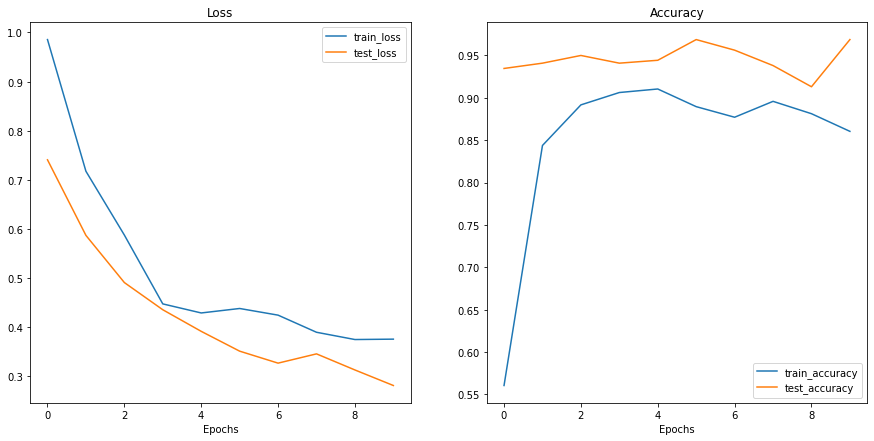

In [ ]:
from helper_functions import plot_loss_curves

plot_loss_curves(effnetb2_results)

哇！

这些损失曲线看起来真不错。

看起来我们的模型表现得相当好，也许如果训练时间再长一些，可能会有所提升，同时也可以尝试一些[数据增强](https://www.learnpytorch.io/04_pytorch_custom_datasets/#6-other-forms-of-transforms-data-augmentation)（帮助防止在更长时间训练中可能出现的过拟合问题）。


### 3.5 保存 EffNetB2 特征提取器

现在我们有了一个表现良好的训练模型，接下来我们将它保存到文件中，以便将来导入和使用。

为了保存我们的模型，我们可以使用我们在[05. PyTorch Going Modular 第5节](https://www.learnpytorch.io/05_pytorch_going_modular/#5-creating-a-function-to-save-the-model-utilspy)中创建的 [`utils.save_model()`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/utils.py) 函数。

我们将把 `target_dir` 设置为 `"models"`，并将 `model_name` 设置为 `"09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth"`（有点复杂，但至少我们知道发生了什么）。


In [ ]:
from going_modular.going_modular import utils

# Save the model
utils.save_model(model=effnetb2,
                 target_dir="models",
                 model_name="09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth")

[INFO] Saving model to: models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth


### 3.6 检查 EffNetB2 特征提取器的大小

由于我们部署模型以驱动 FoodVision Mini 时的一个标准是 **速度**（\~30FPS 或更高），所以我们需要检查模型的大小。

为什么要检查模型大小？

好吧，虽然并非总是如此，但模型的大小会影响其推理速度。

也就是说，如果一个模型有更多的参数，它通常需要执行更多的操作，而每一个操作都需要一定的计算能力。

由于我们希望模型能够在计算能力有限的设备上运行（例如在移动设备或Web浏览器中），通常模型越小越好（只要它在准确性方面表现良好）。

为了检查模型的大小（以字节为单位），我们可以使用 Python 的 [`pathlib.Path.stat("path_to_model").st_size`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.stat)，然后通过 `(1024*1024)` 将其大致转换为兆字节。


In [ ]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_effnetb2_model_size = Path("models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly)
print(f"Pretrained EffNetB2 feature extractor model size: {pretrained_effnetb2_model_size} MB")

Pretrained EffNetB2 feature extractor model size: 29 MB


### 3.7 收集 EffNetB2 特征提取器的统计信息

我们已经收集了关于 EffNetB2 特征提取器模型的一些统计数据，例如测试损失、测试准确率和模型大小，接下来我们将它们都收集到一个字典中，以便与即将到来的 ViT 特征提取器进行比较。

另外，我们还可以计算一个额外的统计数据，模型的总参数数目。

我们可以通过计算 `effnetb2.parameters()` 中的元素数量（或权重/模式）来实现。我们可以使用 [`torch.numel()`](https://pytorch.org/docs/stable/generated/torch.numel.html) 方法（“元素数量”的简称）来访问每个参数中的元素数量。


In [ ]:
# Count number of parameters in EffNetB2
effnetb2_total_params = sum(torch.numel(param) for param in effnetb2.parameters())
effnetb2_total_params

7705221

太棒了！

现在，让我们将所有信息放入一个字典中，以便以后进行比较。


In [ ]:
# Create a dictionary with EffNetB2 statistics
effnetb2_stats = {"test_loss": effnetb2_results["test_loss"][-1],
                  "test_acc": effnetb2_results["test_acc"][-1],
                  "number_of_parameters": effnetb2_total_params,
                  "model_size (MB)": pretrained_effnetb2_model_size}
effnetb2_stats

{'test_loss': 0.28128674924373626,
 'test_acc': 0.96875,
 'number_of_parameters': 7705221,
 'model_size (MB)': 29}

太棒了！

看起来我们的 EffNetB2 模型已经达到了 95% 以上的准确率！

标准 1：达到 95% 以上的准确率，✔️ 完成！


## 4. 创建 ViT 特征提取器

继续我们的 FoodVision Mini 建模实验吧。

这次我们将创建一个 ViT 特征提取器。

我们将采用与 EffNetB2 特征提取器类似的方法，只不过这次使用 [`torchvision.models.vit_b_16()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16) 代替 `torchvision.models.efficientnet_b2()`。

我们将从创建一个名为 `create_vit_model()` 的函数开始，它将与 `create_effnetb2_model()` 非常相似，只是这次返回的是 ViT 特征提取器模型和转换，而不是 EffNetB2。

另一个细微的区别是，`torchvision.models.vit_b_16()` 的输出层被称为 `heads`，而不是 `classifier`。


In [ ]:
# Check out ViT heads layer
vit = torchvision.models.vit_b_16()
vit.heads

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

了解了这些，我们已经拥有了拼图的所有部分。


In [ ]:
def create_vit_model(num_classes:int=3,
                     seed:int=42):
    """Creates a ViT-B/16 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of target classes. Defaults to 3.
        seed (int, optional): random seed value for output layer. Defaults to 42.

    Returns:
        model (torch.nn.Module): ViT-B/16 feature extractor model.
        transforms (torchvision.transforms): ViT-B/16 image transforms.
    """
    # Create ViT_B_16 pretrained weights, transforms and model
    weights = torchvision.models.ViT_B_16_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.vit_b_16(weights=weights)

    # Freeze all layers in model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head to suit our needs (this will be trainable)
    torch.manual_seed(seed)
    model.heads = nn.Sequential(nn.Linear(in_features=768, # keep this the same as original model
                                          out_features=num_classes)) # update to reflect target number of classes

    return model, transforms

ViT 特征提取器模型创建函数已准备好！

让我们测试一下吧。


In [ ]:
# Create ViT model and transforms
vit, vit_transforms = create_vit_model(num_classes=3,
                                       seed=42)

没有错误，太棒了！

现在让我们使用 `torchinfo.summary()` 获取一个漂亮的 ViT 模型总结。


In [ ]:
from torchinfo import summary

# # Print ViT feature extractor model summary (uncomment for full output)
# summary(vit,
#         input_size=(1, 3, 224, 224),
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"])

就像我们的 EffNetB2 特征提取器模型一样，我们的 ViT 模型的基础层也已冻结，并且输出层根据我们的需求进行了定制！

不过，你注意到一个很大的区别了吗？

我们的 ViT 模型相比 EffNetB2 模型有 *更多* 的参数。也许这在稍后我们比较模型的速度和性能时会有所影响。


### 4.1 为 ViT 创建 DataLoaders

我们的 ViT 模型已准备好，接下来我们为它创建一些 `DataLoader`。

我们将按照与 EffNetB2 相同的方式进行，只不过这次我们使用 `vit_transforms` 来转换我们的图像，使其与 ViT 模型训练时的格式一致。


In [ ]:
# Setup ViT DataLoaders
from going_modular.going_modular import data_setup
train_dataloader_vit, test_dataloader_vit, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                       test_dir=test_dir,
                                                                                       transform=vit_transforms,
                                                                                       batch_size=32)

### 4.2 训练 ViT 特征提取器

你知道现在是什么时候了……

……是训练时间（用和歌曲 [Closing Time](https://youtu.be/xGytDsqkQY8) 相同的旋律唱）。

让我们使用 `engine.train()` 函数来训练我们的 ViT 特征提取器模型 10 个 epoch，优化器使用 `torch.optim.Adam()` 和学习率 `1e-3`，损失函数使用 `torch.nn.CrossEntropyLoss()`。

在训练之前，我们将使用 `set_seeds()` 函数来尽量让我们的结果具有可重复性。


In [ ]:
from going_modular.going_modular import engine

# Setup optimizer
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=1e-3)
# Setup loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Train ViT model with seeds set for reproducibility
set_seeds()
vit_results = engine.train(model=vit,
                           train_dataloader=train_dataloader_vit,
                           test_dataloader=test_dataloader_vit,
                           epochs=10,
                           optimizer=optimizer,
                           loss_fn=loss_fn,
                           device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7023 | train_acc: 0.7500 | test_loss: 0.2714 | test_acc: 0.9290
Epoch: 2 | train_loss: 0.2531 | train_acc: 0.9104 | test_loss: 0.1669 | test_acc: 0.9602
Epoch: 3 | train_loss: 0.1766 | train_acc: 0.9542 | test_loss: 0.1270 | test_acc: 0.9693
Epoch: 4 | train_loss: 0.1277 | train_acc: 0.9625 | test_loss: 0.1072 | test_acc: 0.9722
Epoch: 5 | train_loss: 0.1163 | train_acc: 0.9646 | test_loss: 0.0950 | test_acc: 0.9784
Epoch: 6 | train_loss: 0.1270 | train_acc: 0.9375 | test_loss: 0.0830 | test_acc: 0.9722
Epoch: 7 | train_loss: 0.0899 | train_acc: 0.9771 | test_loss: 0.0844 | test_acc: 0.9784
Epoch: 8 | train_loss: 0.0928 | train_acc: 0.9812 | test_loss: 0.0759 | test_acc: 0.9722
Epoch: 9 | train_loss: 0.0933 | train_acc: 0.9792 | test_loss: 0.0729 | test_acc: 0.9784
Epoch: 10 | train_loss: 0.0662 | train_acc: 0.9833 | test_loss: 0.0642 | test_acc: 0.9847


### 4.3 检查 ViT 损失曲线

好啦，好啦，好啦，ViT 模型已经训练完成，让我们来看看损失曲线。

> **备注：** 别忘了，你可以在[04. PyTorch 自定义数据集 第8节](https://www.learnpytorch.io/04_pytorch_custom_datasets/#8-what-should-an-ideal-loss-curve-look-like)中查看理想的损失曲线应该是什么样的。


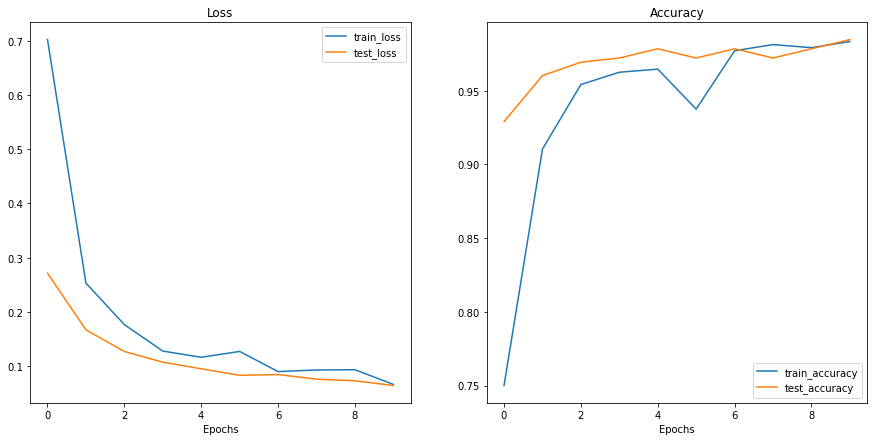

In [ ]:
from helper_functions import plot_loss_curves

plot_loss_curves(vit_results)

哦耶！

这些损失曲线看起来真不错。就像我们的 EffNetB2 特征提取器模型一样，看起来我们的 ViT 模型可能也能从更长的训练时间中受益，并且或许可以尝试一些[数据增强](https://www.learnpytorch.io/04_pytorch_custom_datasets/#6-other-forms-of-transforms-data-augmentation)（帮助防止过拟合）。


### 4.4 保存 ViT 特征提取器

我们的 ViT 模型表现非常出色！

所以我们将它保存到文件中，这样我们以后需要时就可以导入并使用它。

我们可以使用我们在[05. PyTorch Going Modular 第5节](https://www.learnpytorch.io/05_pytorch_going_modular/#5-creating-a-function-to-save-the-model-utilspy)中创建的 `utils.save_model()` 函数来实现。


In [ ]:
# Save the model
from going_modular.going_modular import utils

utils.save_model(model=vit,
                 target_dir="models",
                 model_name="09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth")

[INFO] Saving model to: models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth


### 4.5 检查 ViT 特征提取器的大小

既然我们想要比较 EffNetB2 模型和 ViT 模型在多个特性上的表现，让我们先来了解一下 ViT 模型的大小。

为了检查模型的大小（以字节为单位），我们可以使用 Python 的 `pathlib.Path.stat("path_to_model").st_size`，然后通过 `(1024*1024)` 将其大致转换为兆字节。


In [ ]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_vit_model_size = Path("models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly)
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

Pretrained ViT feature extractor model size: 327 MB


嗯，ViT 特征提取器模型的大小与我们的 EffNetB2 模型相比如何呢？

我们很快就能通过比较所有模型的特性来得出答案。


### 4.6 收集 ViT 特征提取器统计信息

让我们汇总所有 ViT 特征提取器模型的统计数据。

我们在上面的总结输出中看到了这些数据，但我们将计算它的总参数数量。


In [ ]:
# Count number of parameters in ViT
vit_total_params = sum(torch.numel(param) for param in vit.parameters())
vit_total_params

85800963

哇，看起来它的参数数量比我们的 EffNetB2 多了不少！

> **备注：** 更大的参数数量（或权重/模式）通常意味着模型具有更高的 *学习能力*，但是否真正利用了这种额外的能力是另一个问题。考虑到这一点，我们的 EffNetB2 模型有 7,705,221 个参数，而我们的 ViT 模型有 85,800,963 个（多了 11.1 倍），所以我们可以假设，如果给 ViT 模型更多的数据（更多学习的机会），它可能有更强的学习能力。然而，这种更大的学习能力通常伴随着更大的模型文件大小和更长的推理时间。

现在，让我们创建一个字典，包含我们 ViT 模型的一些重要特性。


In [ ]:
# Create ViT statistics dictionary
vit_stats = {"test_loss": vit_results["test_loss"][-1],
             "test_acc": vit_results["test_acc"][-1],
             "number_of_parameters": vit_total_params,
             "model_size (MB)": pretrained_vit_model_size}

vit_stats

{'test_loss': 0.06418210905976593,
 'test_acc': 0.984659090909091,
 'number_of_parameters': 85800963,
 'model_size (MB)': 327}

太棒了！看起来我们的 ViT 模型也达到了超过 95% 的准确率。


## 5. 使用训练好的模型进行预测并计时

我们已经有了几个训练好的模型，表现都相当不错。

现在，我们来测试一下它们的实际表现怎么样？

也就是说，看看它们在进行预测（执行推理）时的表现如何。

我们知道，两个模型在测试数据集上的准确率都超过了 95%，那么它们的推理速度如何呢？

理想情况下，如果我们将 FoodVision Mini 模型部署到移动设备上，让人们拍摄食物照片并进行识别，我们希望预测能够实时进行（约 30 帧每秒）。

这就是我们的第二个标准：快速模型。

为了找出每个模型执行推理的时间，让我们创建一个名为 `pred_and_store()` 的函数，逐一遍历测试数据集中的每一张图片并进行预测。

我们将为每个预测计时，并将结果存储在一个通用的预测格式中：字典列表（列表中的每个元素是一个单独的预测，每个预测都是一个字典）。

> **备注：** 我们逐个计时预测，而不是按批次计时，因为当我们的模型部署后，它可能一次只会对一张图片进行预测。也就是说，当有人拍照时，我们的模型会对那张单独的图片进行预测。

由于我们希望对测试集中的所有图像进行预测，首先我们需要获取所有测试图像的路径列表，以便进行迭代。

为此，我们将使用 Python 的 [`pathlib.Path("target_dir").glob("*/*.jpg")`](https://docs.python.org/3/library/pathlib.html#basic-use) 来查找目标目录中所有扩展名为 `.jpg` 的文件路径（即我们所有的测试图像）。


In [ ]:
from pathlib import Path

# Get all test data paths
print(f"[INFO] Finding all filepaths ending with '.jpg' in directory: {test_dir}")
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
test_data_paths[:5]

[INFO] Finding all filepaths ending with '.jpg' in directory: data/pizza_steak_sushi_20_percent/test


[PosixPath('data/pizza_steak_sushi_20_percent/test/steak/831681.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/3100563.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/2752603.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/39461.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/730464.jpg')]

### 5.1 创建一个函数，对测试数据集进行预测

现在我们已经有了测试图像路径的列表，接下来我们开始实现 `pred_and_store()` 函数：

1. 创建一个函数，接受路径列表、训练好的 PyTorch 模型、一系列图像转换（用于准备图像）、目标类别名称列表和目标设备。
2. 创建一个空列表，用于存储预测字典（我们希望函数返回一个字典列表，每个字典代表一个预测）。
3. 遍历目标输入路径（步骤 4-14 会在循环内进行）。
4. 为每次循环迭代创建一个空字典，用来存储每个样本的预测值。
5. 获取样本路径和真实标签名称（我们可以通过推断路径来获得类别）。
6. 使用 Python 的 [`timeit.default_timer()`](https://docs.python.org/3/library/timeit.html#timeit.default_timer) 开始预测计时。
7. 使用 [`PIL.Image.open(path)`](https://pillow.readthedocs.io/en/stable/reference/Image.html#functions) 打开图像。
8. 对图像进行转换，使其能够与目标模型兼容，并为图像添加批次维度，并将图像发送到目标设备。
9. 通过将模型发送到目标设备并启用 `eval()` 模式来准备模型进行推理。
10. 启用 [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) 并将目标转换后的图像传递给模型，使用 `torch.softmax()` 计算预测概率，并使用 `torch.argmax()` 获取预测标签。
11. 将预测概率和预测类别添加到在步骤 4 中创建的预测字典中。同时，确保预测概率被移动到 CPU 上，以便与 NumPy 和 pandas 等非 GPU 库一起使用，方便后续检查。
12. 结束在步骤 6 中启动的预测计时器，并将时间添加到步骤 4 中创建的预测字典。
13. 查看预测类别是否与步骤 5 中的真实类别匹配，并将结果添加到步骤 4 中创建的预测字典中。
14. 将更新后的预测字典附加到步骤 2 中创建的空预测列表中。
15. 返回预测字典的列表。

一大堆步骤，但没有我们无法处理的！

让我们开始吧。


In [ ]:
import pathlib
import torch

from PIL import Image
from timeit import default_timer as timer
from tqdm.auto import tqdm
from typing import List, Dict

# 1. Create a function to return a list of dictionaries with sample, truth label, prediction, prediction probability and prediction time
def pred_and_store(paths: List[pathlib.Path],
                   model: torch.nn.Module,
                   transform: torchvision.transforms,
                   class_names: List[str],
                   device: str = "cuda" if torch.cuda.is_available() else "cpu") -> List[Dict]:

    # 2. Create an empty list to store prediction dictionaries
    pred_list = []

    # 3. Loop through target paths
    for path in tqdm(paths):

        # 4. Create empty dictionary to store prediction information for each sample
        pred_dict = {}

        # 5. Get the sample path and ground truth class name
        pred_dict["image_path"] = path
        class_name = path.parent.stem
        pred_dict["class_name"] = class_name

        # 6. Start the prediction timer
        start_time = timer()

        # 7. Open image path
        img = Image.open(path)

        # 8. Transform the image, add batch dimension and put image on target device
        transformed_image = transform(img).unsqueeze(0).to(device)

        # 9. Prepare model for inference by sending it to target device and turning on eval() mode
        model.to(device)
        model.eval()

        # 10. Get prediction probability, predicition label and prediction class
        with torch.inference_mode():
            pred_logit = model(transformed_image) # perform inference on target sample
            pred_prob = torch.softmax(pred_logit, dim=1) # turn logits into prediction probabilities
            pred_label = torch.argmax(pred_prob, dim=1) # turn prediction probabilities into prediction label
            pred_class = class_names[pred_label.cpu()] # hardcode prediction class to be on CPU

            # 11. Make sure things in the dictionary are on CPU (required for inspecting predictions later on)
            pred_dict["pred_prob"] = round(pred_prob.unsqueeze(0).max().cpu().item(), 4)
            pred_dict["pred_class"] = pred_class

            # 12. End the timer and calculate time per pred
            end_time = timer()
            pred_dict["time_for_pred"] = round(end_time-start_time, 4)

        # 13. Does the pred match the true label?
        pred_dict["correct"] = class_name == pred_class

        # 14. Add the dictionary to the list of preds
        pred_list.append(pred_dict)

    # 15. Return list of prediction dictionaries
    return pred_list

哈哈！

这真是一个看起来很棒的函数！

而且你知道吗，既然我们的 `pred_and_store()` 是一个相当实用的用于进行预测并存储结果的函数，它可以存储到 [`going_modular.going_modular.predictions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/predictions.py) 以便后续使用。这个功能可能是你想尝试的扩展，可以参考 [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/) 来获取灵感。


### 5.2 使用 EffNetB2 进行预测并计时

是时候测试我们的 `pred_and_store()` 函数了！

首先，让我们用它在测试数据集上使用 EffNetB2 模型进行预测，同时注意两个细节：

1. **设备** - 我们将硬编码 `device` 参数为 `"cpu"`，因为在部署我们的模型时，可能并不总是能够访问到 `"cuda"`（GPU）设备。

   * 在 CPU 上进行预测将是推理速度的一个很好的指标，因为通常在 CPU 设备上的预测速度比 GPU 设备慢。
2. **转换** - 我们还将确保将 `transform` 参数设置为 `effnetb2_transforms`，以确保图像以与我们的 `effnetb2` 模型训练时相同的方式进行打开和转换。


In [ ]:
# Make predictions across test dataset with EffNetB2
effnetb2_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                          model=effnetb2,
                                          transform=effnetb2_transforms,
                                          class_names=class_names,
                                          device="cpu") # make predictions on CPU

  0%|          | 0/150 [00:00<?, ?it/s]

太棒了！看看那些预测飞得多快！

让我们查看前几个预测，看看它们的结果如何。


In [ ]:
# Inspect the first 2 prediction dictionaries
effnetb2_test_pred_dicts[:2]

[{'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/steak/831681.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.9293,
  'pred_class': 'steak',
  'time_for_pred': 0.0494,
  'correct': True},
 {'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/steak/3100563.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.9534,
  'pred_class': 'steak',
  'time_for_pred': 0.0264,
  'correct': True}]

太棒了！

看起来我们的 `pred_and_store()` 函数运行得很顺利。

得益于我们的字典列表数据结构，我们有了许多有用的信息可以进一步检查。

为了做到这一点，让我们将字典列表转换成一个 pandas DataFrame。


In [ ]:
# Turn the test_pred_dicts into a DataFrame
import pandas as pd
effnetb2_test_pred_df = pd.DataFrame(effnetb2_test_pred_dicts)
effnetb2_test_pred_df.head()

,image_path,class_name,pred_prob,pred_class,time_for_pred,correct
0,data/pizza_steak_sushi_20_percent/test/steak/8...,steak,0.9293,steak,0.0494,True
1,data/pizza_steak_sushi_20_percent/test/steak/3...,steak,0.9534,steak,0.0264,True
2,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.7532,steak,0.0256,True
3,data/pizza_steak_sushi_20_percent/test/steak/3...,steak,0.5935,steak,0.0263,True
4,data/pizza_steak_sushi_20_percent/test/steak/7...,steak,0.8959,steak,0.0269,True


太美妙了！

看看这些预测字典是如何轻松地转化为我们可以进行分析的结构化格式。

比如，我们可以找出 EffNetB2 模型错误的预测数量……


In [ ]:
# Check number of correct predictions
effnetb2_test_pred_df.correct.value_counts()

True     145
False      5
Name: correct, dtype: int64

五个错误预测，150个总预测，表现不错！

那么，平均预测时间如何呢？


In [ ]:
# Find the average time per prediction
effnetb2_average_time_per_pred = round(effnetb2_test_pred_df.time_for_pred.mean(), 4)
print(f"EffNetB2 average time per prediction: {effnetb2_average_time_per_pred} seconds")

EffNetB2 average time per prediction: 0.0269 seconds


嗯，平均预测时间如何满足我们模型在实时 (\~30FPS 或每个预测 0.03 秒) 的标准呢？

> **备注：** 不同硬件类型的预测时间会有所不同（例如本地的 Intel i9 与 Google Colab 的 CPU）。通常硬件越好、速度越快，预测也就越快。例如，在我的本地深度学习 PC 上，使用 Intel i9 芯片时，EffNetB2 的平均预测时间大约是 0.031 秒（稍低于实时）。然而，在 Google Colab 上（我不确定 Colab 使用什么 CPU 硬件，但看起来可能是 [Intel(R) Xeon(R)](https://stackoverflow.com/questions/47805170/whats-the-hardware-spec-for-google-colaboratory)），EffNetB2 的平均预测时间大约是 0.1396 秒（慢了 3-4 倍）。

让我们将 EffNetB2 每个预测的平均时间添加到我们的 `effnetb2_stats` 字典中。


In [ ]:
# Add EffNetB2 average prediction time to stats dictionary
effnetb2_stats["time_per_pred_cpu"] = effnetb2_average_time_per_pred
effnetb2_stats

{'test_loss': 0.28128674924373626,
 'test_acc': 0.96875,
 'number_of_parameters': 7705221,
 'model_size (MB)': 29,
 'time_per_pred_cpu': 0.0269}

### 5.3 使用 ViT 进行预测并计时

我们已经使用 EffNetB2 模型进行了预测，现在让我们对 ViT 模型做同样的事情。

为此，我们可以使用上面创建的 `pred_and_store()` 函数，只不过这次我们将传入我们的 `vit` 模型以及 `vit_transforms`。

我们将继续将预测保留在 CPU 上，通过设置 `device="cpu"`（这里的一个自然扩展是测试 CPU 和 GPU 上的预测时间）。


In [ ]:
# Make list of prediction dictionaries with ViT feature extractor model on test images
vit_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                     model=vit,
                                     transform=vit_transforms,
                                     class_names=class_names,
                                     device="cpu")

  0%|          | 0/150 [00:00<?, ?it/s]

预测完成！

现在，让我们查看前几个预测。


In [ ]:
# Check the first couple of ViT predictions on the test dataset
vit_test_pred_dicts[:2]

[{'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/steak/831681.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.9933,
  'pred_class': 'steak',
  'time_for_pred': 0.1313,
  'correct': True},
 {'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/steak/3100563.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.9893,
  'pred_class': 'steak',
  'time_for_pred': 0.0638,
  'correct': True}]

太棒了！

就像之前一样，由于我们的 ViT 模型的预测以字典列表的形式存储，我们可以轻松地将它们转换成 pandas DataFrame，便于进一步检查。


In [ ]:
# Turn vit_test_pred_dicts into a DataFrame
import pandas as pd
vit_test_pred_df = pd.DataFrame(vit_test_pred_dicts)
vit_test_pred_df.head()

,image_path,class_name,pred_prob,pred_class,time_for_pred,correct
0,data/pizza_steak_sushi_20_percent/test/steak/8...,steak,0.9933,steak,0.1313,True
1,data/pizza_steak_sushi_20_percent/test/steak/3...,steak,0.9893,steak,0.0638,True
2,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.9971,steak,0.0627,True
3,data/pizza_steak_sushi_20_percent/test/steak/3...,steak,0.7685,steak,0.0632,True
4,data/pizza_steak_sushi_20_percent/test/steak/7...,steak,0.9499,steak,0.0641,True


让我们看看我们的 ViT 模型预测正确的数量是多少?

In [ ]:
# Count the number of correct predictions
vit_test_pred_df.correct.value_counts()

True     148
False      2
Name: correct, dtype: int64

哇！

我们的 ViT 模型在正确预测方面表现比 EffNetB2 略好，在整个测试数据集上仅有两个样本预测错误。

作为扩展，你可能想要可视化 ViT 模型的错误预测，看看是否有什么原因导致它出现错误。

那么，如何计算 ViT 模型每个预测所花的时间呢？


In [ ]:
# Calculate average time per prediction for ViT model
vit_average_time_per_pred = round(vit_test_pred_df.time_for_pred.mean(), 4)
print(f"ViT average time per prediction: {vit_average_time_per_pred} seconds")

ViT average time per prediction: 0.0641 seconds


看起来我们的 ViT 模型每个预测的时间稍微比 EffNetB2 模型的平均时间慢一些，但它在我们的第二个标准：速度方面表现如何呢？

暂时，让我们将这个值添加到我们的 `vit_stats` 字典中，以便将其与 EffNetB2 模型的统计数据进行比较。

> **备注：** 每个预测的平均时间值将高度依赖于运行硬件。例如，对于 ViT 模型，在我的本地深度学习 PC（Intel i9 CPU）上，平均每个预测的时间是 0.0693-0.0777 秒。而在 Google Colab 上，ViT 模型的平均预测时间是 0.6766-0.7113 秒。


In [ ]:
# Add average prediction time for ViT model on CPU
vit_stats["time_per_pred_cpu"] = vit_average_time_per_pred
vit_stats

{'test_loss': 0.06418210905976593,
 'test_acc': 0.984659090909091,
 'number_of_parameters': 85800963,
 'model_size (MB)': 327,
 'time_per_pred_cpu': 0.0641}

## 6. 比较模型结果、预测时间和大小

我们的两个最佳模型已经训练并评估完成。

现在，让我们将它们进行对比，比较它们的不同统计数据。

为此，我们将把 `effnetb2_stats` 和 `vit_stats` 字典转换为 pandas DataFrame。

我们将添加一列来显示模型名称，并将测试准确率从小数转换为百分比。


In [ ]:
# Turn stat dictionaries into DataFrame
df = pd.DataFrame([effnetb2_stats, vit_stats])

# Add column for model names
df["model"] = ["EffNetB2", "ViT"]

# Convert accuracy to percentages
df["test_acc"] = round(df["test_acc"] * 100, 2)

df

,test_loss,test_acc,number_of_parameters,model_size (MB),time_per_pred_cpu,model
0,0.281287,96.88,7705221,29,0.0269,EffNetB2
1,0.064182,98.47,85800963,327,0.0641,ViT


太棒了！

看起来我们的模型在总体测试准确率方面相当接近，但它们在其他领域的表现如何呢？

一种方法是将 ViT 模型的统计数据除以 EffNetB2 模型的统计数据，以找出它们之间的不同比率。

让我们创建另一个 DataFrame 来进行这个计算。


In [ ]:
# Compare ViT to EffNetB2 across different characteristics
pd.DataFrame(data=(df.set_index("model").loc["ViT"] / df.set_index("model").loc["EffNetB2"]), # divide ViT statistics by EffNetB2 statistics
             columns=["ViT to EffNetB2 ratios"]).T

,test_loss,test_acc,number_of_parameters,model_size (MB),time_per_pred_cpu
ViT to EffNetB2 ratios,0.228173,1.016412,11.135432,11.275862,2.3829


看起来我们的 ViT 模型在性能指标上（测试损失，越低越好，和测试准确率，越高越好）优于 EffNetB2 模型，但却牺牲了以下几点：

* 参数数量大约是 EffNetB2 的 11 倍以上。
* 模型大小大约是 EffNetB2 的 11 倍以上。
* 每张图像的预测时间是 EffNetB2 的 2.5 倍以上。

这些权衡值得吗？

或许如果我们有无限的计算能力，ViT 模型会更合适，但对于我们的应用场景，即将 FoodVision Mini 模型部署到较小的设备（例如手机）上，我们可能会选择 EffNetB2 模型，尽管性能稍有下降，但预测速度更快且模型大小小得多。


### 6.1 可视化速度与性能的权衡

我们已经看到，在性能指标如测试损失和测试准确度方面，我们的ViT模型优于EffNetB2模型。

然而，EffNetB2模型的预测速度更快，并且模型体积要小得多。

> **注：** 性能或推理时间通常也被称为“延迟”。

那么，我们如何将这个事实可视化呢？

我们可以通过使用matplotlib创建一个图表来做到这一点：

1. 从比较数据框中创建散点图，比较EffNetB2和ViT的`time_per_pred_cpu`和`test_acc`值。
2. 添加相应数据的标题和标签，并根据美观调整字体大小。
3. 在第一步的散点图上标注样本及其相应标签（模型名称）。
4. 根据模型大小（`model_size (MB)`）创建图例。


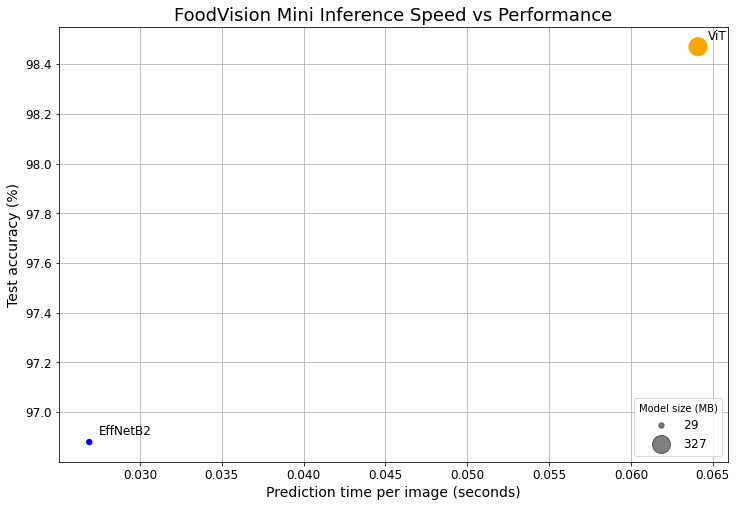

In [ ]:
# 1. Create a plot from model comparison DataFrame
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(data=df,
                     x="time_per_pred_cpu",
                     y="test_acc",
                     c=["blue", "orange"], # what colours to use?
                     s="model_size (MB)") # size the dots by the model sizes

# 2. Add titles, labels and customize fontsize for aesthetics
ax.set_title("FoodVision Mini Inference Speed vs Performance", fontsize=18)
ax.set_xlabel("Prediction time per image (seconds)", fontsize=14)
ax.set_ylabel("Test accuracy (%)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True)

# 3. Annotate with model names
for index, row in df.iterrows():
    ax.annotate(text=row["model"], # note: depending on your version of Matplotlib, you may need to use "s=..." or "text=...", see: https://github.com/faustomorales/keras-ocr/issues/183#issuecomment-977733270
                xy=(row["time_per_pred_cpu"]+0.0006, row["test_acc"]+0.03),
                size=12)

# 4. Create a legend based on model sizes
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.5)
model_size_legend = ax.legend(handles,
                              labels,
                              loc="lower right",
                              title="Model size (MB)",
                              fontsize=12)

# Save the figure
!mdkir images/
plt.savefig("images/09-foodvision-mini-inference-speed-vs-performance.jpg")

# Show the figure
plt.show()

哇！

这张图确实很好地可视化了**速度与性能的权衡**，换句话说，当你使用一个更大、更高效的深度模型（像我们的ViT模型）时，它*通常*需要更长的时间来进行推理（更高的延迟）。

当然，也有一些例外，新的研究不断发布，旨在帮助更大模型实现更快的性能。

虽然我们可能会想要部署*表现最好的*模型，但同样也要考虑模型实际应用的场景。

在我们的案例中，模型在测试损失和测试准确度上的性能差异并不是非常极端。

但由于我们想要强调速度，因此我们决定部署EffNetB2模型，因为它更快且占用的资源更小。

> **注：** 不同硬件类型（例如Intel i9、Google Colab CPU或GPU）的预测时间会有所不同，因此考虑并测试模型最终运行的位置非常重要。提出类似“模型将在哪里运行？”或“运行模型的理想场景是什么？”的问题，并通过实验寻找答案，最终有助于更顺利地部署模型。


## 7. 通过创建Gradio演示来实现FoodVision Mini

我们已经决定先部署EffNetB2模型（当然，之后也可以更改）。

那么，我们该怎么做呢？

部署机器学习模型的方法有很多，每种方法都有其特定的使用场景（如上所述）。

我们将专注于也许是最快的、绝对是最有趣的方式，将模型部署到互联网上。

那就是使用[Gradio](https://gradio.app/)。

什么是Gradio？

它的主页描述得非常好：

> Gradio是展示机器学习模型的最快方式，提供一个友好的Web界面，让任何人都可以在任何地方使用它！

为什么要创建模型的演示？

因为测试集上的指标看起来很漂亮，但你永远不知道模型在实际环境中的表现，直到你将它投入实际使用。

那么，让我们开始部署吧！

我们将从导入Gradio并使用常见的别名`gr`开始，如果它没有安装，我们会先安装它。


In [ ]:
# Import/install Gradio
try:
    import gradio as gr
except:
    !pip -q install gradio
    import gradio as gr

print(f"Gradio version: {gr.__version__}")

Gradio version: 3.1.4


Gradio准备好了！

让我们把FoodVision Mini变成一个演示应用程序吧。


### 7.1 Gradio概述

Gradio的整体理念与我们在整个课程中反复提到的非常相似。

我们的**输入**和**输出**是什么？

我们应该如何到达目标？

这就是我们机器学习模型的作用。

```
输入 -> ML模型 -> 输出
```

在我们的案例中，对于FoodVision Mini，输入是食物的图像，ML模型是EffNetB2，输出是食物的分类（披萨、牛排或寿司）。

```
食物图像 -> EffNetB2 -> 输出
```

尽管输入和输出的概念几乎可以适用于任何其他类型的机器学习问题。

你的输入和输出可能是以下任何组合：

* 图像
* 文本
* 视频
* 表格数据
* 音频
* 数字
* 及更多

你构建的机器学习模型将取决于你的输入和输出。

Gradio通过创建一个接口（[`gradio.Interface()`](https://gradio.app/docs/#interface-header)）来模拟这种范式，将输入与输出连接起来。

```
gradio.Interface(fn, inputs, outputs)
```

其中，`fn`是一个Python函数，用于将`inputs`映射到`outputs`。

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-gradio-workflow.png" alt="gradio workflow of inputs flowing into some kind of model or function and then producing outputs" width=900/>

*Gradio提供了一个非常有用的`Interface`类，能够轻松创建一个从输入到模型/函数再到输出的工作流程，其中输入和输出几乎可以是你想要的任何内容。例如，你可能会输入推文（文本），查看它们是否与机器学习相关，或者[输入文本提示生成图像](https://huggingface.co/blog/stable_diffusion)。*

> **注：** Gradio有大量可能的`inputs`和`outputs`选项，称为“组件”，从图像到文本到数字到音频到视频等。你可以在[Gradio组件文档](https://gradio.app/docs/#components)中查看所有这些选项。


### 7.2 创建一个函数来映射我们的输入和输出

为了使用Gradio创建FoodVision Mini演示，我们需要一个函数来将输入映射到输出。

我们之前创建了一个名为`pred_and_store()`的函数，用于在目标文件列表上使用给定的模型进行预测，并将结果存储在字典列表中。

现在我们创建一个类似的函数，但这次聚焦于使用EffNetB2模型对单张图像进行预测。

更具体地，我们需要一个函数，它接收一张图像作为输入，进行预处理（转换），用EffNetB2进行预测，然后返回预测结果（简写为`pred`或`pred label`）以及预测概率（`pred prob`）。

同时，我们还要返回处理这一过程所用的时间：

```
输入: 图像 -> 转换 -> 使用EffNetB2进行预测 -> 输出: pred, pred prob, 花费的时间
```

这个函数将作为我们Gradio接口的`fn`参数。

首先，确保我们的EffNetB2模型位于CPU上（因为我们坚持使用CPU进行预测，不过如果你有GPU，也可以改变这一点）。


In [ ]:
# Put EffNetB2 on CPU
effnetb2.to("cpu")

# Check the device
next(iter(effnetb2.parameters())).device

device(type='cpu')

下面我们来创建一个名为`predict()`的函数，以复现上述的工作流程。


In [ ]:
from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

太棒了！

现在，让我们通过对测试数据集中的一张随机图像进行预测，来看看我们的函数是如何工作的。

我们将首先从测试目录中获取所有图像路径的列表，然后随机选择一张。

接下来，我们将使用 [`PIL.Image.open()`](https://pillow.readthedocs.io/en/stable/reference/Image.html#functions) 打开随机选择的图像。

最后，我们将图像传递给我们的 `predict()` 函数。


In [ ]:
import random
from PIL import Image

# Get a list of all test image filepaths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))

# Randomly select a test image path
random_image_path = random.sample(test_data_paths, k=1)[0]

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(img=image)
print(f"Prediction label and probability dictionary: \n{pred_dict}")
print(f"Prediction time: {pred_time} seconds")

[INFO] Predicting on image at path: data/pizza_steak_sushi_20_percent/test/pizza/3770514.jpg

Prediction label and probability dictionary: 
{'pizza': 0.9785208702087402, 'steak': 0.01169557310640812, 'sushi': 0.009783552028238773}
Prediction time: 0.027 seconds


很好！

多次运行上面的代码，我们可以看到每次预测时EffNetB2模型给出的不同预测概率，以及每次预测所花费的时间。


### 7.3 创建一个示例图像列表

我们的`predict()`函数使我们能够从输入 -> 转换 -> ML模型 -> 输出。

这正是我们需要的Gradio演示。

但在创建演示之前，让我们再创建一件事：一个示例列表。

Gradio的[`Interface`](https://gradio.app/docs/#interface)类接受一个`examples`列表作为可选参数（`gr.Interface(examples=List[Any])`）。

`examples`参数的格式是一个列表的列表。

所以让我们创建一个包含我们测试图像的随机文件路径的列表。

三个示例就足够了。

In [ ]:
# Create a list of example inputs to our Gradio demo
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=3)]
example_list

[['data/pizza_steak_sushi_20_percent/test/sushi/804460.jpg'],
 ['data/pizza_steak_sushi_20_percent/test/steak/746921.jpg'],
 ['data/pizza_steak_sushi_20_percent/test/steak/2117351.jpg']]

完美！

我们的Gradio演示将展示这些作为示例输入，让人们可以尝试并看看它是如何工作的，而无需上传自己的数据。


### 7.4 构建Gradio界面

是时候将所有内容整合起来，带来我们的FoodVision Mini演示了！

让我们创建一个Gradio界面来复现这个工作流程：

```
输入: 图像 -> 转换 -> 使用EffNetB2进行预测 -> 输出: pred, pred prob, 花费的时间
```

我们可以使用[`gradio.Interface()`](https://gradio.app/docs/#interface)类，并设置以下参数：

* `fn` - 一个Python函数，用于将`inputs`映射到`outputs`，在我们的案例中，我们将使用我们的`predict()`函数。
* `inputs` - 界面的输入，比如使用[`gradio.Image()`](https://gradio.app/docs/#image)或`"image"`来表示图像。
* `outputs` - 一旦`inputs`通过`fn`处理后的输出，比如使用[`gradio.Label()`](https://gradio.app/docs/#label)来显示模型的预测标签，或者使用[`gradio.Number()`](https://gradio.app/docs/#number)来显示模型的预测时间。

  * **注：** Gradio提供了许多内置的`inputs`和`outputs`选项，称为["Components"](https://gradio.app/docs/#components)。
* `examples` - 用于演示的示例列表。
* `title` - 演示的标题字符串。
* `description` - 演示的描述字符串。
* `article` - 演示底部的参考说明。

一旦我们创建了`gr.Interface()`的演示实例，就可以使用[`gradio.Interface().launch()`](https://gradio.app/docs/#launch-header)或`demo.launch()`命令将它启动。

很简单！


In [ ]:
import gradio as gr

# Create title, description and article strings
title = "FoodVision Mini 🍕🥩🍣"
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food as pizza, steak or sushi."
article = "Created at [09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/)."

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True) # generate a publically shareable URL?

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://27541.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f122dd0f0d0>,
 'http://127.0.0.1:7860/',
 'https://27541.gradio.app')

<img src="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/09-gradio-running-in-google-colab-and-in-browser.gif" alt="Gradio demo running in Google Colab and on the web" width=750/>

*FoodVision Mini Gradio演示在Google Colab和浏览器中的运行（从Google Colab运行时链接仅有效72小时）。你可以查看[Hugging Face Spaces上的永久实时演示](https://huggingface.co/spaces/mrdbourke/foodvision_mini)。*

哇哦！！！多么壮观的演示！！！

FoodVision Mini已经正式以界面的形式上线，任何人都可以使用并尝试。

如果在`launch()`方法中设置`share=True`参数，Gradio还会提供一个可分享的链接，如`https://123XYZ.gradio.app`（这个链接仅为示例，可能已经过期），有效期为72小时。

该链接提供了一个代理，指向你启动的Gradio界面。

对于更持久的托管，你可以将Gradio应用上传到[Hugging Face Spaces](https://huggingface.co/spaces)或任何能够运行Python代码的地方。


## 8. 将我们的FoodVision Mini Gradio演示转变为可部署的应用

我们已经通过Gradio演示看到了FoodVision Mini模型的实际运行。

但是，如果我们想与朋友分享呢？

我们可以使用提供的Gradio链接，但该共享链接仅在72小时内有效。

为了让我们的FoodVision Mini演示更加持久，我们可以将其打包成应用程序并上传到[Hugging Face Spaces](https://huggingface.co/spaces/launch)。


### 8.1 什么是Hugging Face Spaces？

Hugging Face Spaces是一个资源，允许你托管和分享机器学习应用。

创建一个演示是展示和测试你所做工作的最佳方式之一。

而Spaces正是让你实现这一目标的地方。

你可以将Hugging Face视为机器学习的GitHub。

如果拥有一个优秀的GitHub作品集能够展示你的编码能力，那么拥有一个优秀的Hugging Face作品集可以展示你的机器学习能力。

> **注：** 还有很多其他地方我们可以上传和托管我们的Gradio应用，比如Google Cloud、AWS（Amazon Web Services）或其他云服务提供商，但我们选择使用Hugging Face Spaces，原因在于其易用性以及在机器学习社区的广泛采用。


### 8.2 部署的Gradio应用结构

为了上传我们的Gradio演示应用，我们需要将与其相关的所有内容放入一个单独的目录。

例如，我们的演示可能位于路径 `demos/foodvision_mini/`，文件结构如下：

```
demos/
└── foodvision_mini/
    ├── 09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth
    ├── app.py
    ├── examples/
    │   ├── example_1.jpg
    │   ├── example_2.jpg
    │   └── example_3.jpg
    ├── model.py
    └── requirements.txt
```

其中：

* `09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth` 是我们训练好的PyTorch模型文件。
* `app.py` 包含我们的Gradio应用（类似于启动应用的代码）。

  * **注：** `app.py` 是Hugging Face Spaces的默认文件名，如果你将应用部署到Hugging Face，Spaces将默认寻找名为 `app.py` 的文件来运行。这个设置是可以修改的。
* `examples/` 包含用于我们的Gradio应用的示例图像。
* `model.py` 包含模型定义以及与模型相关的任何转换。
* `requirements.txt` 包含运行应用所需的依赖项，如 `torch`、`torchvision` 和 `gradio`。

为什么这样做？

因为这是我们可以开始使用的最简单的布局之一。

我们的重点是：*实验，实验，再实验！*

我们能够更快地进行小型实验，最终就能更好地进行更大的实验。

我们将致力于重现上述结构，但你也可以看到一个在Hugging Face Spaces上运行的实时演示应用以及文件结构：

* [FoodVision Mini的实时Gradio演示 🍕🥩🍣](https://huggingface.co/spaces/mrdbourke/foodvision_mini)。
* [FoodVision Mini在Hugging Face Spaces上的文件结构](https://huggingface.co/spaces/mrdbourke/foodvision_mini/tree/main)。


### 8.3 创建一个 `demos` 文件夹来存储我们的FoodVision Mini应用文件

首先，让我们创建一个 `demos/` 目录来存储所有的FoodVision Mini应用文件。

我们可以使用Python的 [`pathlib.Path("path_to_dir")`](https://docs.python.org/3/library/pathlib.html#basic-use) 来建立目录路径，并使用 [`pathlib.Path("path_to_dir").mkdir()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir) 来创建该目录。


In [ ]:
import shutil
from pathlib import Path

# Create FoodVision mini demo path
foodvision_mini_demo_path = Path("demos/foodvision_mini/")

# Remove files that might already exist there and create new directory
if foodvision_mini_demo_path.exists():
    shutil.rmtree(foodvision_mini_demo_path)
# If the file doesn't exist, create it anyway
foodvision_mini_demo_path.mkdir(parents=True,
                                exist_ok=True)

# Check what's in the folder
!ls demos/foodvision_mini/

### 8.4 创建一个示例图像文件夹，用于我们的FoodVision Mini演示

现在我们已经有了一个目录来存储FoodVision Mini演示文件，让我们添加一些示例图像。

从测试数据集中选择三张示例图像应该足够了。

为了实现这一点，我们将：

1. 在 `demos/foodvision_mini` 目录下创建一个 `examples/` 目录。
2. 从测试数据集中选择三张随机图像，并将它们的文件路径收集到一个列表中。
3. 将这三张随机图像从测试数据集复制到 `demos/foodvision_mini/examples/` 目录中。


In [ ]:
import shutil
from pathlib import Path

# 1. Create an examples directory
foodvision_mini_examples_path = foodvision_mini_demo_path / "examples"
foodvision_mini_examples_path.mkdir(parents=True, exist_ok=True)

# 2. Collect three random test dataset image paths
foodvision_mini_examples = [Path('data/pizza_steak_sushi_20_percent/test/sushi/592799.jpg'),
                            Path('data/pizza_steak_sushi_20_percent/test/steak/3622237.jpg'),
                            Path('data/pizza_steak_sushi_20_percent/test/pizza/2582289.jpg')]

# 3. Copy the three random images to the examples directory
for example in foodvision_mini_examples:
    destination = foodvision_mini_examples_path / example.name
    print(f"[INFO] Copying {example} to {destination}")
    shutil.copy2(src=example, dst=destination)

[INFO] Copying data/pizza_steak_sushi_20_percent/test/sushi/592799.jpg to demos/foodvision_mini/examples/592799.jpg
[INFO] Copying data/pizza_steak_sushi_20_percent/test/steak/3622237.jpg to demos/foodvision_mini/examples/3622237.jpg
[INFO] Copying data/pizza_steak_sushi_20_percent/test/pizza/2582289.jpg to demos/foodvision_mini/examples/2582289.jpg


现在，为了验证我们的示例图像是否存在，让我们使用 [`os.listdir()`](https://docs.python.org/3/library/os.html#os.listdir) 列出 `demos/foodvision_mini/examples/` 目录的内容，然后将文件路径格式化成一个列表的列表（以便与Gradio的 [`gradio.Interface()`](https://gradio.app/docs/#interface) 的 `example` 参数兼容）。


In [ ]:
import os

# Get example filepaths in a list of lists
example_list = [["examples/" + example] for example in os.listdir(foodvision_mini_examples_path)]
example_list

[['examples/3622237.jpg'], ['examples/592799.jpg'], ['examples/2582289.jpg']]

### 8.5 将我们训练好的EffNetB2模型移动到FoodVision Mini演示目录

我们之前将FoodVision Mini的EffNetB2特征提取模型保存到了 `models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth`。

为了避免重复保存模型文件，让我们将模型移动到 `demos/foodvision_mini` 目录。

我们可以使用Python的 [`shutil.move()`](https://docs.python.org/3/library/shutil.html#shutil.move) 方法，通过传入 `src`（目标文件的源路径）和 `dst`（目标文件要移动到的目标路径）参数来实现。


In [ ]:
import shutil

# Create a source path for our target model
effnetb2_foodvision_mini_model_path = "models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth"

# Create a destination path for our target model
effnetb2_foodvision_mini_model_destination = foodvision_mini_demo_path / effnetb2_foodvision_mini_model_path.split("/")[1]

# Try to move the file
try:
    print(f"[INFO] Attempting to move {effnetb2_foodvision_mini_model_path} to {effnetb2_foodvision_mini_model_destination}")

    # Move the model
    shutil.move(src=effnetb2_foodvision_mini_model_path,
                dst=effnetb2_foodvision_mini_model_destination)

    print(f"[INFO] Model move complete.")

# If the model has already been moved, check if it exists
except:
    print(f"[INFO] No model found at {effnetb2_foodvision_mini_model_path}, perhaps its already been moved?")
    print(f"[INFO] Model exists at {effnetb2_foodvision_mini_model_destination}: {effnetb2_foodvision_mini_model_destination.exists()}")

[INFO] Attempting to move models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth to demos/foodvision_mini/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth
[INFO] Model move complete.


### 8.6 将我们的EffNetB2模型转化为Python脚本（`model.py`）

我们当前模型的`state_dict`已保存到 `demos/foodvision_mini/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth`。

为了加载它，我们可以使用 `model.load_state_dict()` 配合 `torch.load()`。

> **注：** 如果需要刷新保存和加载模型（或PyTorch中的模型`state_dict`）的操作，请查看[01. PyTorch工作流程基础部分5：保存和加载PyTorch模型](https://www.learnpytorch.io/01_pytorch_workflow/#5-saving-and-loading-a-pytorch-model) 或查看PyTorch教程中的[什么是PyTorch中的`state_dict`](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html)。

但在我们这样做之前，我们首先需要一个方法来实例化`model`。

为了模块化地做到这一点，我们将创建一个名为 `model.py` 的脚本，其中包含我们在[第3.1节：*创建一个函数来制作EffNetB2特征提取器*](https://www.learnpytorch.io/09_pytorch_model_deployment/#31-creating-a-function-to-make-an-effnetb2-feature-extractor)中创建的 `create_effnetb2_model()` 函数。

这样，我们就可以在 *另一个* 脚本（见下文的 `app.py`）中导入该函数，然后用它来创建我们的EffNetB2 `model` 实例，并获取相应的转换。

就像在[05. PyTorch模块化](https://www.learnpytorch.io/05_pytorch_going_modular/)中一样，我们将使用 `%%writefile path/to/file` 魔法命令将一段代码转化为一个文件。


In [ ]:
%%writefile demos/foodvision_mini/model.py
import torch
import torchvision

from torch import nn


def create_effnetb2_model(num_classes:int=3,
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head.
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model.
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )

    return model, transforms

Writing demos/foodvision_mini/model.py


### 8.7 将我们的FoodVision Mini Gradio应用转化为Python脚本（`app.py`）

现在，我们已经有了一个 `model.py` 脚本，以及一个保存的模型 `state_dict` 路径，可以加载它。

接下来是构建 `app.py`。

我们称之为 `app.py`，因为在默认情况下，当你创建一个HuggingFace Space时，它会寻找一个名为 `app.py` 的文件来运行和托管（不过你可以在设置中更改这一点）。

我们的 `app.py` 脚本将把所有部分组合在一起，创建我们的Gradio演示，并将有四个主要部分：

1. **导入和类名设置** - 在这里，我们将导入各种依赖项，包括从 `model.py` 中导入的 `create_effnetb2_model()` 函数，并设置我们FoodVision Mini应用的不同类名。
2. **模型和转换准备** - 在这里，我们将创建一个EffNetB2模型实例以及与其相关的转换，然后加载保存的模型权重/`state_dict`。当我们加载模型时，我们还将设置 `map_location=torch.device("cpu")` 在 [`torch.load()`](https://pytorch.org/docs/stable/generated/torch.load.html) 中，以确保无论模型训练时使用的是哪个设备，它都能加载到CPU上（我们这样做是因为我们在部署时不一定有GPU，如果模型是在GPU上训练的，但我们尝试将其部署到CPU上而没有显式声明，就会报错）。
3. **预测函数** - Gradio的 `gradio.Interface()` 接受一个 `fn` 参数来将输入映射到输出，我们的 `predict()` 函数将与我们在[第7.2节：*创建一个函数来映射我们的输入和输出*](https://www.learnpytorch.io/09_pytorch_model_deployment/#72-creating-a-function-to-map-our-inputs-and-outputs)中定义的相同，它将接收一张图像，然后使用加载的转换对其进行预处理，之后使用加载的模型对其进行预测。

   * **注：** 我们将需要通过 `examples` 参数动态创建示例列表。我们可以通过以下方式来实现：`[["examples/" + example] for example in os.listdir("examples")]`。
4. **Gradio应用** - 这是我们演示的主要逻辑所在，我们将创建一个名为 `demo` 的 `gradio.Interface()` 实例，将我们的输入、`predict()` 函数和输出组合在一起。最后，我们通过调用 `demo.launch()` 来启动我们的FoodVision Mini演示！


In [ ]:
%%writefile demos/foodvision_mini/app.py
### 1. Imports and class names setup ###
import gradio as gr
import os
import torch

from model import create_effnetb2_model
from timeit import default_timer as timer
from typing import Tuple, Dict

# Setup class names
class_names = ["pizza", "steak", "sushi"]

### 2. Model and transforms preparation ###

# Create EffNetB2 model
effnetb2, effnetb2_transforms = create_effnetb2_model(
    num_classes=3, # len(class_names) would also work
)

# Load saved weights
effnetb2.load_state_dict(
    torch.load(
        f="09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth",
        map_location=torch.device("cpu"),  # load to CPU
    )
)

### 3. Predict function ###

# Create predict function
def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

### 4. Gradio app ###

# Create title, description and article strings
title = "FoodVision Mini 🍕🥩🍣"
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food as pizza, steak or sushi."
article = "Created at [09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/)."

# Create examples list from "examples/" directory
example_list = [["examples/" + example] for example in os.listdir("examples")]

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    # Create examples list from "examples/" directory
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch()

Writing demos/foodvision_mini/app.py


### 8.8 为FoodVision Mini创建一个依赖文件（`requirements.txt`）

我们需要为FoodVision Mini应用创建的最后一个文件是一个 [`requirements.txt` 文件](https://learnpython.com/blog/python-requirements-file/)。

这个文件将是一个文本文件，包含我们演示所需的所有依赖项。

当我们将演示应用部署到Hugging Face Spaces时，它会搜索这个文件，并安装我们定义的依赖项，以便我们的应用可以正常运行。

好消息是，我们只需要三个依赖项！

1. `torch==1.12.0`
2. `torchvision==0.13.0`
3. `gradio==3.1.4`

`"==1.12.0"` 表示要安装的版本号。

定义版本号不是100%必须的，但我们现在这么做是为了确保如果将来有任何重大更新发生，我们的应用仍然能够运行（如果你遇到任何错误，欢迎在课程的[GitHub Issues](https://github.com/mrdbourke/pytorch-deep-learning/issues)中发布）。


In [ ]:
%%writefile demos/foodvision_mini/requirements.txt
torch==1.12.0
torchvision==0.13.0
gradio==3.1.4

Writing demos/foodvision_mini/requirements.txt


太棒了！

我们已经正式准备好了所有部署FoodVision Mini演示所需的文件！


## 9. 将我们的FoodVision Mini应用部署到HuggingFace Spaces

我们已经有了包含FoodVision Mini演示的文件，现在我们该如何让它在Hugging Face Spaces上运行呢？

上传到Hugging Face Space（也称为[Hugging Face Repository](https://huggingface.co/docs/hub/repositories-getting-started#getting-started-with-repositories)，类似于git仓库）有两种主要方式：

1. [通过Hugging Face Web界面上传（最简单）](https://huggingface.co/docs/hub/repositories-getting-started#adding-files-to-a-repository-web-ui)。
2. [通过命令行或终端上传](https://huggingface.co/docs/hub/repositories-getting-started#terminal)。

   * **额外提示：** 你也可以使用[`huggingface_hub`库](https://huggingface.co/docs/huggingface_hub/index)与Hugging Face进行交互，这是上述两种方式的一个很好的扩展。

你可以阅读有关这两种方式的文档，但我们将选择第二种方式。

> **注：** 要在Hugging Face上托管任何内容，你需要[注册一个免费的Hugging Face账号](https://huggingface.co/join)。


### 9.1 下载我们的FoodVision Mini应用文件

让我们查看一下我们在 `demos/foodvision_mini` 中的演示文件。

为此，我们可以使用 `!ls` 命令，后面跟上目标文件路径。

`ls` 代表“列出”，而 `!` 表示我们希望在 shell 层级执行该命令。


In [ ]:
!ls demos/foodvision_mini

09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth
app.py
examples
model.py
requirements.txt


这些都是我们创建的文件！

为了开始将我们的文件上传到Hugging Face，接下来我们需要从Google Colab（或你运行此笔记本的任何地方）下载它们。

为此，我们首先使用以下命令将文件压缩为一个单一的zip文件：

```
zip -r ../foodvision_mini.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"
```

其中：

* `zip` 代表“压缩”，意思是“请将以下目录中的文件一起压缩”。
* `-r` 代表“递归”，意思是“遍历目标目录中的所有文件”。
* `../foodvision_mini.zip` 是我们希望将文件压缩到的目标目录。
* `*` 代表“当前目录中的所有文件”。
* `-x` 代表“排除这些文件”。

我们可以使用 [`google.colab.files.download("demos/foodvision_mini.zip")`](https://colab.research.google.com/notebooks/io.ipynb) 从Google Colab下载我们的zip文件（我们会将其放在 `try` 和 `except` 块中，以防我们不是在Google Colab中运行代码，如果是这样，我们会打印一条消息，提示手动下载文件）。

让我们试试看！


In [ ]:
# Change into and then zip the foodvision_mini folder but exclude certain files
!cd demos/foodvision_mini && zip -r ../foodvision_mini.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

# Download the zipped FoodVision Mini app (if running in Google Colab)
try:
    from google.colab import files
    files.download("demos/foodvision_mini.zip")
except:
    print("Not running in Google Colab, can't use google.colab.files.download(), please manually download.")

updating: 09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth (deflated 8%)
updating: app.py (deflated 57%)
updating: examples/ (stored 0%)
updating: examples/3622237.jpg (deflated 0%)
updating: examples/592799.jpg (deflated 1%)
updating: examples/2582289.jpg (deflated 17%)
updating: model.py (deflated 56%)
updating: requirements.txt (deflated 4%)
Not running in Google Colab, can't use google.colab.files.download(), please manually download.


哇哦！

看起来我们的 `zip` 命令成功了。

如果你是在Google Colab中运行这个笔记本，你应该会看到文件开始在浏览器中下载。

否则，你可以在[课程GitHub的 `demos/` 目录](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/demos)中查看 `foodvision_mini.zip` 文件（以及更多文件）。


### 9.2 在本地运行我们的FoodVision Mini演示

如果你下载了 `foodvision_mini.zip` 文件，你可以通过以下步骤在本地测试它：

1. 解压文件。
2. 打开终端或命令行提示符。
3. 进入 `foodvision_mini` 目录（`cd foodvision_mini`）。
4. 创建一个虚拟环境（`python3 -m venv env`）。
5. 激活虚拟环境（`source env/bin/activate`）。
6. 安装依赖（`pip install -r requirements.txt`，其中 "`-r`" 用于递归安装）。

   * **注：** 这一步可能需要5-10分钟，具体取决于你的网络连接。如果遇到错误，可能需要先升级 `pip`：`pip install --upgrade pip`。
7. 运行应用（`python3 app.py`）。

这应该会在你的机器上启动一个Gradio演示，URL类似于 `http://127.0.0.1:7860/`。

> **注：** 如果你在本地运行应用并且看到 `flagged/` 目录，它包含了被“标记”的样本。
>
> 例如，如果有人尝试演示并且模型产生了不正确的结果，可以将该样本“标记”并进行后续审查。
>
> 有关Gradio中标记功能的更多信息，请参阅[标记文档](https://gradio.app/docs/#flagging)。


### 9.3 上传到Hugging Face

我们已经验证了FoodVision Mini应用在本地运行正常，但创建机器学习演示的乐趣在于将其展示给其他人，并让他们使用它。

为此，我们将把FoodVision Mini演示上传到Hugging Face。

> **注：** 以下一系列步骤使用了Git（一个文件跟踪系统）工作流程。若想了解更多关于Git的工作原理，建议查看[Git和GitHub入门教程](https://youtu.be/RGOj5yH7evk)（在freeCodeCamp上）。

1. [注册](https://huggingface.co/join)一个Hugging Face账号。
2. 通过访问你的个人资料并点击[“New Space”](https://huggingface.co/new-space)来创建一个新的Hugging Face Space。

   * **注：** 在Hugging Face中，Space也被称为“代码仓库”（用于存储代码/文件的地方）或简称“repo”。
3. 为Space命名，例如，我的Space叫做 `mrdbourke/foodvision_mini`，你可以在这里查看：[https://huggingface.co/spaces/mrdbourke/foodvision\_mini](https://huggingface.co/spaces/mrdbourke/foodvision_mini)
4. 选择一个许可证（我使用了[MIT](https://opensource.org/licenses/MIT)）。
5. 选择Gradio作为Space的SDK（软件开发工具包）。

   * **注：** 你也可以选择其他选项，如Streamlit，但因为我们的应用是用Gradio构建的，所以我们选择了它。
6. 选择你的Space是公开的还是私有的（我选择了公开，因为我希望我的Space可以对其他人开放）。
7. 点击“Create Space”。
8. 通过运行类似以下命令在终端或命令提示符中克隆仓库：`git clone https://huggingface.co/spaces/[YOUR_USERNAME]/[YOUR_SPACE_NAME]`。

   * **注：** 你也可以通过在“Files and versions”标签下上传文件来添加文件。
9. 将下载的 `foodvision_mini` 文件夹的内容复制/移动到克隆的仓库文件夹中。
10. 为了上传和跟踪更大的文件（例如，超过10MB的文件，或者在我们案例中，PyTorch模型文件），你需要[安装Git LFS](https://git-lfs.github.com/)（“git大文件存储”的缩写）。
11. 安装Git LFS后，可以通过运行 `git lfs install` 来激活它。
12. 在 `foodvision_mini` 目录中，使用 `git lfs track "*.file_extension"` 来跟踪超过10MB的文件。

    * 使用 `git lfs track "09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth"` 跟踪EffNetB2 PyTorch模型文件。
13. 跟踪 `.gitattributes` 文件（当从HuggingFace克隆时自动创建，此文件有助于确保我们的大文件被Git LFS跟踪）。你可以在[FoodVision Mini Hugging Face Space](https://huggingface.co/spaces/mrdbourke/foodvision_mini/blob/main/.gitattributes)中查看 `.gitattributes` 文件示例。

    * `git add .gitattributes`
14. 添加其余的 `foodvision_mini` 应用文件并提交：

    * `git add *`
    * `git commit -m "first commit"`
15. 推送（上传）文件到Hugging Face：

    * `git push`
16. 等待3-5分钟，等待构建完成（以后构建会更快），并且你的应用将上线！

如果一切顺利，你应该能看到我们的FoodVision Mini Gradio演示的实时示例，像这样：[FoodVision Mini的实时Gradio演示](https://huggingface.co/spaces/mrdbourke/foodvision_mini)。

我们甚至可以通过[`IPython.display.IFrame`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.IFrame) 和格式为 `https://hf.space/embed/[YOUR_USERNAME]/[YOUR_SPACE_NAME]/+` 的链接，将我们的FoodVision Mini Gradio演示嵌入到我们的笔记本中，作为一个[iframe](https://gradio.app/sharing_your_app/#embedding-with-iframes)。


In [ ]:
# IPython is a library to help make Python interactive
from IPython.display import IFrame

# Embed FoodVision Mini Gradio demo
IFrame(src="https://hf.space/embed/mrdbourke/foodvision_mini/+", width=900, height=750)

## 10. 创建FoodVision Big

在过去的几个章节中，我们一直在致力于让FoodVision Mini变为现实。

现在我们已经看到它在实时演示中运行，如何让它更进一步呢？

怎么做？

FoodVision Big！

由于FoodVision Mini是基于[Food101数据集](https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html)（包括101类食物，每类1000张图像）中关于披萨、牛排和寿司的图像进行训练的，我们不妨通过训练一个模型，涵盖所有101类食物，将FoodVision Mini升级为FoodVision Big！

我们将从三个类扩展到101个类！

从披萨、牛排、寿司到披萨、牛排、寿司、热狗、苹果派、胡萝卜蛋糕、巧克力蛋糕、炸薯条、大蒜面包、拉面、玉米片、玉米饼等更多美食！

怎么做？

其实我们已经准备好了所有步骤，我们只需要稍微修改我们的EffNetB2模型，并准备一个不同的数据集。

为了完成里程碑项目3，让我们重建一个类似于FoodVision Mini（三个类）的Gradio演示，但这次是针对FoodVision Big（101个类）。

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-model-deployment-foodvision-mini-to-foodvision-big.png" alt="foodvision mini model on three classes: pizza, steak, sushi and foodvision big on all of the 101 classes in the food101 dataset" width=900/>

*FoodVision Mini适用于三种食物类别：披萨、牛排和寿司。而FoodVision Big将其提升到101种食物类别：所有[Food101数据集中的类别](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/food101_class_names.txt)。*


### 10.1 为FoodVision Big创建模型和转换

在创建FoodVision Mini时，我们看到EffNetB2模型在速度和性能之间提供了一个很好的折衷（它在速度较快的情况下表现良好）。

因此，我们将继续使用相同的模型来构建FoodVision Big。

我们可以使用我们在[第3.1节](https://www.learnpytorch.io/09_pytorch_model_deployment/#31-creating-a-function-to-make-an-effnetb2-feature-extractor)中创建的 `create_effnetb2_model()` 函数，为Food101创建一个EffNetB2特征提取器，并传递参数 `num_classes=101`（因为Food101有101个类别）。


In [ ]:
# Create EffNetB2 model capable of fitting to 101 classes for Food101
effnetb2_food101, effnetb2_transforms = create_effnetb2_model(num_classes=101)

太棒了！

现在，让我们查看一下我们模型的总结。


In [ ]:
from torchinfo import summary

# # Get a summary of EffNetB2 feature extractor for Food101 with 101 output classes (uncomment for full output)
# summary(effnetb2_food101,
#         input_size=(1, 3, 224, 224),
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"])

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-effnetb2-feature-extractor-101-classes.png" width=900 alt="effnetb2 feature extractor with 100 output classes model summary"/>

不错！

看看，和我们为FoodVision Mini创建的EffNetB2模型一样，基础层是冻结的（这些层是预训练在ImageNet上的），而外层（`classifier` 层）是可训练的，输出形状为 `[batch_size, 101]`（`101` 是Food101中的101个类别）。

现在，由于我们将处理的数据量比通常更多，我们可以在我们的转换（`effnetb2_transforms`）中加入一些数据增强来增强训练数据。

> **注：** 数据增强是一种技术，用于改变输入训练样本的外观（例如，旋转图像或稍微扭曲它），从而人为地增加训练数据集的多样性，以期防止过拟合。你可以在[04. PyTorch自定义数据集第6节](https://www.learnpytorch.io/04_pytorch_custom_datasets/#6-other-forms-of-transforms-data-augmentation)中查看更多关于数据增强的内容。

让我们组合一个 `torchvision.transforms` 的管道，使用 [`torchvision.transforms.TrivialAugmentWide()`](https://pytorch.org/vision/main/generated/torchvision.transforms.TrivialAugmentWide.html)（这是PyTorch团队在他们的[计算机视觉食谱](https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#break-down-of-key-accuracy-improvements)中使用的数据增强），以及 `effnetb2_transforms` 来转换我们的训练图像。


In [ ]:
# Create Food101 training data transforms (only perform data augmentation on the training images)
food101_train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.TrivialAugmentWide(),
    effnetb2_transforms,
])

史诗般的进展！

现在，让我们比较一下 `food101_train_transforms`（用于训练数据）和 `effnetb2_transforms`（用于测试/推理数据）。


In [ ]:
print(f"Training transforms:\n{food101_train_transforms}\n")
print(f"Testing transforms:\n{effnetb2_transforms}")

Training transforms:
Compose(
    TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
    ImageClassification(
    crop_size=[288]
    resize_size=[288]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)
)

Testing transforms:
ImageClassification(
    crop_size=[288]
    resize_size=[288]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)


### 10.2 获取FoodVision Big的数据

对于FoodVision Mini，我们创建了自己[自定义的数据拆分](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb)，对整个Food101数据集进行了划分。

要获取完整的Food101数据集，我们可以使用[`torchvision.datasets.Food101()`](https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html)。

我们将首先设置一个路径到 `data/` 目录来存储图像。

然后，我们将使用 `food101_train_transforms` 和 `effnetb2_transforms` 来分别转换训练和测试数据集。

> **注：** 如果你使用的是Google Colab，下面的代码块大约需要3-5分钟才能完全运行并下载Food101图像。
>
> 这是因为需要下载超过100,000张图像（101个类别，每个类别1000张图像）。如果你重启了Google Colab的运行时并重新回到这个单元格，图像将需要重新下载。或者，如果你在本地运行这个笔记本，图像会被缓存并存储在 `torchvision.datasets.Food101()` 的 `root` 参数指定的目录中。


In [ ]:
from torchvision import datasets

# Setup data directory
from pathlib import Path
data_dir = Path("data")

# Get training data (~750 images x 101 food classes)
train_data = datasets.Food101(root=data_dir, # path to download data to
                              split="train", # dataset split to get
                              transform=food101_train_transforms, # perform data augmentation on training data
                              download=True) # want to download?

# Get testing data (~250 images x 101 food classes)
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             transform=effnetb2_transforms, # perform normal EffNetB2 transforms on test data
                             download=True)

数据已下载！

现在我们可以使用 `train_data.classes` 获取所有类别的列表。


In [ ]:
# Get Food101 class names
food101_class_names = train_data.classes

# View the first 10
food101_class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

哈哈！这些听起来都是些美味的食物（不过我之前没听说过“beignets”... 更新：经过快速Google搜索后，发现beignets也看起来很美味）。

你可以在课程的GitHub上看到完整的Food101类别名称列表，位于[`extras/food101_class_names.txt`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/food101_class_names.txt)文件中。


### 10.3 创建Food101数据集的子集以便更快地实验

这一步是可选的。

我们不*需要*创建另一个Food101数据集的子集，我们可以在整个101,000张图像上训练和评估模型。

但为了保持训练速度，让我们创建一个训练和测试数据集的20%子集。

我们的目标是看看仅使用20%的数据，我们能否超过原始[Food101论文](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/)中最好的结果。

下面是我们使用/将使用的数据集的详细情况：

| **笔记本**            | **项目名称**                | **数据集**      | **类别数**          | **训练图像数** | **测试图像数** |
| ------------------ | ----------------------- | ------------ | ---------------- | --------- | --------- |
| 04, 05, 06, 07, 08 | FoodVision Mini (10%数据) | Food101自定义拆分 | 3（披萨、牛排、寿司）      | 225       | 75        |
| 07, 08, 09         | FoodVision Mini (20%数据) | Food101自定义拆分 | 3（披萨、牛排、寿司）      | 450       | 150       |
| **09（本章）**         | FoodVision Big (20%数据)  | Food101自定义拆分 | 101（所有Food101类别） | 15150     | 5050      |
| 扩展                 | FoodVision Big          | Food101所有数据  | 101              | 75750     | 25250     |

你能看到趋势吗？

就像我们的模型大小随着时间的推移逐渐增加一样，我们用于实验的数据集大小也在不断增加。

> **注：** 要用20%的数据真正超越原始Food101论文的结果，我们必须在20%的训练数据上训练一个模型，然后在*整个*测试集上评估我们的模型，而不是我们创建的子集。我会把这个作为扩展练习留给你去尝试。我也鼓励你尝试在整个Food101训练数据集上训练模型。

为了制作我们的FoodVision Big（20%数据）子集，让我们创建一个名为 `split_dataset()` 的函数，用于将给定数据集拆分为特定比例。

我们可以使用 [`torch.utils.data.random_split()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split) 来根据 `lengths` 参数创建给定大小的拆分。

`lengths` 参数接受一个期望拆分大小的列表，列表的总和必须等于数据集的总长度。

例如，对于大小为100的数据集，可以传入 `lengths=[20, 80]` 来得到20%和80%的拆分。

我们希望我们的函数返回两个拆分，一个包含目标长度（例如20%的训练数据），另一个包含剩余的长度（例如剩下的80%的训练数据）。

最后，我们将 `generator` 参数设置为 `torch.manual_seed()` 的一个值，以确保实验的可复现性。


In [ ]:
def split_dataset(dataset:torchvision.datasets, split_size:float=0.2, seed:int=42):
    """Randomly splits a given dataset into two proportions based on split_size and seed.

    Args:
        dataset (torchvision.datasets): A PyTorch Dataset, typically one from torchvision.datasets.
        split_size (float, optional): How much of the dataset should be split?
            E.g. split_size=0.2 means there will be a 20% split and an 80% split. Defaults to 0.2.
        seed (int, optional): Seed for random generator. Defaults to 42.

    Returns:
        tuple: (random_split_1, random_split_2) where random_split_1 is of size split_size*len(dataset) and
            random_split_2 is of size (1-split_size)*len(dataset).
    """
    # Create split lengths based on original dataset length
    length_1 = int(len(dataset) * split_size) # desired length
    length_2 = len(dataset) - length_1 # remaining length

    # Print out info
    print(f"[INFO] Splitting dataset of length {len(dataset)} into splits of size: {length_1} ({int(split_size*100)}%), {length_2} ({int((1-split_size)*100)}%)")

    # Create splits with given random seed
    random_split_1, random_split_2 = torch.utils.data.random_split(dataset,
                                                                   lengths=[length_1, length_2],
                                                                   generator=torch.manual_seed(seed)) # set the random seed for reproducible splits
    return random_split_1, random_split_2

数据集拆分函数已创建！

现在让我们通过创建Food101数据集的20%训练和测试数据集拆分来测试它。

In [ ]:
# Create training 20% split of Food101
train_data_food101_20_percent, _ = split_dataset(dataset=train_data,
                                                 split_size=0.2)

# Create testing 20% split of Food101
test_data_food101_20_percent, _ = split_dataset(dataset=test_data,
                                                split_size=0.2)

len(train_data_food101_20_percent), len(test_data_food101_20_percent)

[INFO] Splitting dataset of length 75750 into splits of size: 15150 (20%), 60600 (80%)
[INFO] Splitting dataset of length 25250 into splits of size: 5050 (20%), 20200 (80%)


(15150, 5050)

### 10.4 将我们的Food101数据集转化为`DataLoader`

现在让我们使用 `torch.utils.data.DataLoader()` 将Food101的20%数据集拆分转化为 `DataLoader`。

我们将仅对训练数据设置 `shuffle=True`，并将两个数据集的批次大小设置为 `32`。

如果CPU核心数可用，我们将 `num_workers` 设置为 `4`，如果不可用，则设置为 `2`（尽管 `num_workers` 的值非常依赖硬件，并且是一个实验性的参数，关于这一点，PyTorch论坛上有一个[关于此的讨论帖](https://discuss.pytorch.org/t/guidelines-for-assigning-num-workers-to-dataloader/813)）。


In [ ]:
import os
import torch

BATCH_SIZE = 32
NUM_WORKERS = 2 if os.cpu_count() <= 4 else 4 # this value is very experimental and will depend on the hardware you have available, Google Colab generally provides 2x CPUs

# Create Food101 20 percent training DataLoader
train_dataloader_food101_20_percent = torch.utils.data.DataLoader(train_data_food101_20_percent,
                                                                  batch_size=BATCH_SIZE,
                                                                  shuffle=True,
                                                                  num_workers=NUM_WORKERS)
# Create Food101 20 percent testing DataLoader
test_dataloader_food101_20_percent = torch.utils.data.DataLoader(test_data_food101_20_percent,
                                                                 batch_size=BATCH_SIZE,
                                                                 shuffle=False,
                                                                 num_workers=NUM_WORKERS)

### 10.5 训练FoodVision Big模型

FoodVision Big模型和`DataLoader`已准备好！

现在是训练的时间。

我们将使用 `torch.optim.Adam()` 创建一个优化器，并设置学习率为 `1e-3`。

由于我们有这么多类别，我们还将使用 `torch.nn.CrossEntropyLoss()` 设置一个损失函数，并将 `label_smoothing=0.1`，这与[`torchvision`的最先进训练方法](https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#label-smoothing)一致。

什么是[**标签平滑**](https://paperswithcode.com/method/label-smoothing)？

标签平滑是一种正则化技术（正则化是描述[防止过拟合](https://www.learnpytorch.io/04_pytorch_custom_datasets/#81-how-to-deal-with-overfitting)过程的另一种方式），它减少了模型对某一标签的过度依赖，并将其分散到其他标签上。

本质上，标签平滑的作用是，模型不会在某个标签上变得*过于自信*，而是给其他标签赋予一个非零的值，帮助提高泛化能力。

例如，如果没有标签平滑的模型对于5个类别的输出如下：

```
[0, 0, 0.99, 0.01, 0]
```

带有标签平滑的模型可能会有如下输出：

```
[0.01, 0.01, 0.96, 0.01, 0.01]
```

模型仍然对类别3的预测保持自信，但通过为其他标签赋予小的值，迫使模型至少考虑其他选项。

最后，为了加快训练速度，我们将使用在[05. PyTorch模块化](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train-step-and-test-step-functions-and-train-to-combine-them)中创建的 `engine.train()` 函数来训练模型5个epoch，目标是超过原始Food101论文中测试集上的56.4%的准确率。

让我们训练我们最大的模型吧！

> **注：** 运行下面的代码单元大约需要15-20分钟，在Google Colab上运行时。因为这是训练迄今为止我们使用的最大模型和最多数据（15,150张训练图像，5050张测试图像）。这也是我们之前决定将Food101数据集的20%拆分出来的原因（这样训练时间不会超过一个小时）。


In [ ]:
from going_modular.going_modular import engine

# Setup optimizer
optimizer = torch.optim.Adam(params=effnetb2_food101.parameters(),
                             lr=1e-3)

# Setup loss function
loss_fn = torch.nn.CrossEntropyLoss(label_smoothing=0.1) # throw in a little label smoothing because so many classes

# Want to beat original Food101 paper with 20% of data, need 56.4%+ acc on test dataset
set_seeds()
effnetb2_food101_results = engine.train(model=effnetb2_food101,
                                        train_dataloader=train_dataloader_food101_20_percent,
                                        test_dataloader=test_dataloader_food101_20_percent,
                                        optimizer=optimizer,
                                        loss_fn=loss_fn,
                                        epochs=5,
                                        device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.6317 | train_acc: 0.2869 | test_loss: 2.7670 | test_acc: 0.4937
Epoch: 2 | train_loss: 2.8615 | train_acc: 0.4388 | test_loss: 2.4653 | test_acc: 0.5387
Epoch: 3 | train_loss: 2.6585 | train_acc: 0.4844 | test_loss: 2.3547 | test_acc: 0.5649
Epoch: 4 | train_loss: 2.5494 | train_acc: 0.5116 | test_loss: 2.3038 | test_acc: 0.5755
Epoch: 5 | train_loss: 2.5006 | train_acc: 0.5239 | test_loss: 2.2805 | test_acc: 0.5810


哇哦！！！

看起来我们仅使用20%的训练数据就超过了原始Food101论文中56.4%的准确率（虽然我们只在20%的测试数据上进行了评估，为了完全复制结果，我们可以在100%的测试数据上进行评估）。

这就是迁移学习的力量！


### 10.6 检查FoodVision Big模型的损失曲线

让我们将FoodVision Big的损失曲线可视化。

我们可以使用来自 `helper_functions.py` 中的 `plot_loss_curves()` 函数来实现。


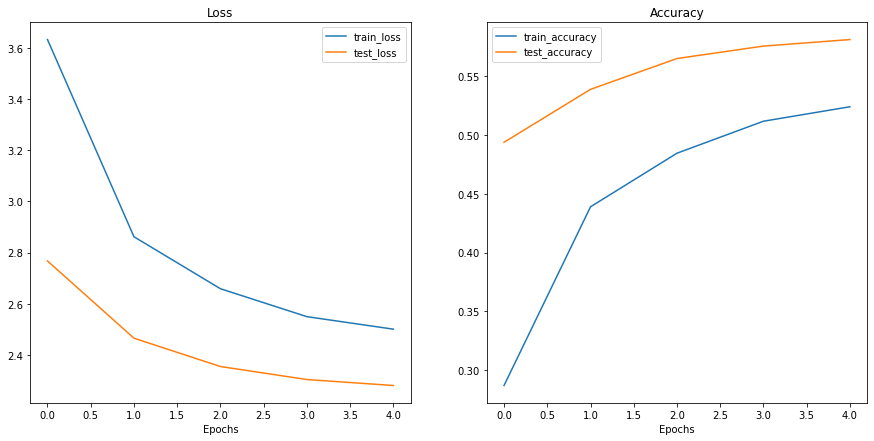

In [ ]:
from helper_functions import plot_loss_curves

# Check out the loss curves for FoodVision Big
plot_loss_curves(effnetb2_food101_results)

太棒了！！！

看起来我们的正则化技术（数据增强和标签平滑）帮助防止了模型的过拟合（训练损失仍然高于测试损失），这表明我们的模型有更多的学习能力，并且通过进一步的训练可能会有所提高。


### 10.7 保存和加载FoodVision Big

现在我们已经训练了最大的模型，让我们将其保存起来，以便以后可以加载它。


In [ ]:
from going_modular.going_modular import utils

# Create a model path
effnetb2_food101_model_path = "09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth"

# Save FoodVision Big model
utils.save_model(model=effnetb2_food101,
                 target_dir="models",
                 model_name=effnetb2_food101_model_path)

[INFO] Saving model to: models/09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth


模型已保存！

在我们继续之前，让我们确保可以将其加载回来。

我们可以先通过 `create_effnetb2_model(num_classes=101)` 创建一个模型实例（101个类，对应所有Food101类别）。

然后使用 [`torch.nn.Module.load_state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict) 和 [`torch.load()`](https://pytorch.org/docs/stable/generated/torch.load.html) 加载已保存的 `state_dict()`。


In [ ]:
# Create Food101 compatible EffNetB2 instance
loaded_effnetb2_food101, effnetb2_transforms = create_effnetb2_model(num_classes=101)

# Load the saved model's state_dict()
loaded_effnetb2_food101.load_state_dict(torch.load("models/09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth"))

<All keys matched successfully>

### 10.8 检查FoodVision Big模型的大小

我们的FoodVision Big模型能够分类101个类别，而FoodVision Mini只能分类3个类别，增加了33.6倍！

这如何影响模型的大小呢？

让我们来看看。


In [ ]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_effnetb2_food101_model_size = Path("models", effnetb2_food101_model_path).stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly)
print(f"Pretrained EffNetB2 feature extractor Food101 model size: {pretrained_effnetb2_food101_model_size} MB")

Pretrained EffNetB2 feature extractor Food101 model size: 30 MB


嗯，看起来模型的大小几乎没有变化（FoodVision Big 为 30 MB，FoodVision Mini 为 29 MB），尽管类别数大幅增加。

这是因为 FoodVision Big 的额外参数 *仅* 在最后一层（分类头）中。

所有基础层在 FoodVision Big 和 FoodVision Mini 之间是相同的。

回到上面并比较模型总结会提供更多细节。

| **模型**                           | **输出形状（类别数）** | **可训练参数** | **总参数**   | **模型大小（MB）** |
| -------------------------------- | ------------- | --------- | --------- | ------------ |
| FoodVision Mini (EffNetB2 特征提取器) | 3             | 4,227     | 7,705,221 | 29           |
| FoodVision Big (EffNetB2 特征提取器)  | 101           | 142,309   | 7,843,303 | 30           |


## 11. 将我们的 FoodVision Big 模型转化为可部署应用

我们已经在 Food101 数据集的 20% 上训练并保存了 EffNetB2 模型。

与其让我们的模型一生都待在文件夹里，不如将它部署出去！

我们将以与部署 FoodVision Mini 模型相同的方式，将 FoodVision Big 模型部署为 Hugging Face Spaces 上的 Gradio 演示应用。

首先，让我们创建一个 `demos/foodvision_big/` 目录，用于存储 FoodVision Big 演示文件，以及一个 `demos/foodvision_big/examples` 目录，用于存放测试演示的示例图像。

完成后，我们将拥有以下文件结构：

```
demos/
  foodvision_big/
    09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth
    app.py
    class_names.txt
    examples/
      example_1.jpg
    model.py
    requirements.txt
```

其中：

* `09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth` 是我们训练好的 PyTorch 模型文件。
* `app.py` 包含我们的 FoodVision Big Gradio 应用。
* `class_names.txt` 包含所有 FoodVision Big 的类名。
* `examples/` 包含用于 Gradio 应用的示例图像。
* `model.py` 包含模型定义以及与模型相关的任何变换。
* `requirements.txt` 包含运行我们的应用所需的依赖项，如 `torch`、`torchvision` 和 `gradio`。


In [ ]:
from pathlib import Path

# Create FoodVision Big demo path
foodvision_big_demo_path = Path("demos/foodvision_big/")

# Make FoodVision Big demo directory
foodvision_big_demo_path.mkdir(parents=True, exist_ok=True)

# Make FoodVision Big demo examples directory
(foodvision_big_demo_path / "examples").mkdir(parents=True, exist_ok=True)

### 11.1 下载示例图像并将其移动到 `examples` 目录

对于我们的示例图像，我们将使用这张著名的 [`pizza-dad` 图像](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg)（我爸爸吃披萨的照片）。

首先，我们通过 `!wget` 命令从课程 GitHub 下载它，然后使用 `!mv` 命令（即“移动”命令）将它移动到 `demos/foodvision_big/examples` 目录。

在这里，我们还将把训练好的 Food101 EffNetB2 模型从 `models/09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth` 移动到 `demos/foodvision_big` 目录。


In [ ]:
# Download and move an example image
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg
!mv 04-pizza-dad.jpeg demos/foodvision_big/examples/04-pizza-dad.jpg

# Move trained model to FoodVision Big demo folder (will error if model is already moved)
!mv models/09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth demos/foodvision_big

--2022-08-25 14:24:41--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: '04-pizza-dad.jpeg’

04-pizza-dad.jpeg   100%[===================>]   2.74M  7.85MB/s    in 0.3s    

2022-08-25 14:24:43 (7.85 MB/s) - '04-pizza-dad.jpeg’ saved [2874848/2874848]



### 11.2 将 Food101 类别名保存到文件 (`class_names.txt`)

由于 Food101 数据集中的类别非常多，我们不将它们作为列表存储在 `app.py` 文件中，而是将它们保存到一个 `.txt` 文件中，并在需要时读取它们。

我们首先通过查看 `food101_class_names` 来回顾一下它们的样子。


In [ ]:
# Check out the first 10 Food101 class names
food101_class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

太棒了，现在我们可以通过首先创建一个路径指向 `demos/foodvision_big/class_names.txt`，然后使用 Python 的 `open()` 打开文件，并将类别名逐行写入文件。

理想情况下，我们希望我们的类别名保存为如下格式：

```
apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
...
```


In [ ]:
# Create path to Food101 class names
foodvision_big_class_names_path = foodvision_big_demo_path / "class_names.txt"

# Write Food101 class names list to file
with open(foodvision_big_class_names_path, "w") as f:
    print(f"[INFO] Saving Food101 class names to {foodvision_big_class_names_path}")
    f.write("\n".join(food101_class_names)) # leave a new line between each class

[INFO] Saving Food101 class names to demos/foodvision_big/class_names.txt


太棒了，现在让我们确保可以读取这些文件。

为此，我们将使用 Python 的 [`open()`](https://www.w3schools.com/python/ref_func_open.asp) 函数以读取模式（`"r"`）打开文件，然后使用 [`readlines()`](https://www.w3schools.com/python/ref_file_readlines.asp) 方法读取 `class_names.txt` 文件中的每一行。

接着，我们可以通过列表推导式和 [`strip()`](https://www.w3schools.com/python/ref_string_strip.asp) 去除每行的换行符，将类别名保存到一个列表中。


In [ ]:
# Open Food101 class names file and read each line into a list
with open(foodvision_big_class_names_path, "r") as f:
    food101_class_names_loaded = [food.strip() for food in  f.readlines()]

# View the first 5 class names loaded back in
food101_class_names_loaded[:5]

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']

### 11.3 将我们的 FoodVision Big 模型转化为 Python 脚本 (`model.py`)

就像 FoodVision Mini 演示一样，我们将创建一个脚本，用于实例化一个 EffNetB2 特征提取模型，并包含其必要的变换。


In [ ]:
%%writefile demos/foodvision_big/model.py
import torch
import torchvision

from torch import nn


def create_effnetb2_model(num_classes:int=3,
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head.
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model.
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )

    return model, transforms

Overwriting demos/foodvision_big/model.py


### 11.4 将我们的 FoodVision Big Gradio 应用转化为 Python 脚本 (`app.py`)

我们已经有了 FoodVision Big 的 `model.py` 脚本，现在让我们创建一个 FoodVision Big 的 `app.py` 脚本。

这将与 FoodVision Mini 的 `app.py` 脚本大致相同，唯一的变化如下：

1. **导入和类别名设置** - `class_names` 变量将是包含所有 Food101 类别的列表，而不是只包含 pizza、steak、sushi。我们可以通过 `demos/foodvision_big/class_names.txt` 文件访问这些类名。
2. **模型和变换准备** - `model` 的 `num_classes=101`，而不是 `num_classes=3`。我们还需要确保从 `"09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth"` 加载权重（即我们的 FoodVision Big 模型路径）。
3. **预测函数** - 这一部分将与 FoodVision Mini 的 `app.py` 保持一致。
4. **Gradio 应用** - Gradio 接口将有不同的 `title`、`description` 和 `article` 参数，以反映 FoodVision Big 的细节。

我们还将确保使用 `%%writefile` 魔法命令将其保存到 `demos/foodvision_big/app.py`。


In [ ]:
%%writefile demos/foodvision_big/app.py
### 1. Imports and class names setup ###
import gradio as gr
import os
import torch

from model import create_effnetb2_model
from timeit import default_timer as timer
from typing import Tuple, Dict

# Setup class names
with open("class_names.txt", "r") as f: # reading them in from class_names.txt
    class_names = [food_name.strip() for food_name in  f.readlines()]

### 2. Model and transforms preparation ###

# Create model
effnetb2, effnetb2_transforms = create_effnetb2_model(
    num_classes=101, # could also use len(class_names)
)

# Load saved weights
effnetb2.load_state_dict(
    torch.load(
        f="09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth",
        map_location=torch.device("cpu"),  # load to CPU
    )
)

### 3. Predict function ###

# Create predict function
def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

### 4. Gradio app ###

# Create title, description and article strings
title = "FoodVision Big 🍔👁"
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food into [101 different classes](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/food101_class_names.txt)."
article = "Created at [09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/)."

# Create examples list from "examples/" directory
example_list = [["examples/" + example] for example in os.listdir("examples")]

# Create Gradio interface
demo = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Label(num_top_classes=5, label="Predictions"),
        gr.Number(label="Prediction time (s)"),
    ],
    examples=example_list,
    title=title,
    description=description,
    article=article,
)

# Launch the app!
demo.launch()

Overwriting demos/foodvision_big/app.py


### 11.5 为 FoodVision Big 创建依赖文件 (`requirements.txt`)

现在我们只需要一个 `requirements.txt` 文件，用来告诉我们的 Hugging Face Space，FoodVision Big 应用所需的依赖项。


In [ ]:
%%writefile demos/foodvision_big/requirements.txt
torch==1.12.0
torchvision==0.13.0
gradio==3.1.4

Overwriting demos/foodvision_big/requirements.txt


### 11.6 下载我们的 FoodVision Big 应用文件

我们已经拥有了部署 FoodVision Big 应用到 Hugging Face 所需的所有文件，现在让我们将它们一起打包并下载。

我们将使用与上面 [第 9.1 节：*下载我们的 FoodVision Mini 应用文件*](https://www.learnpytorch.io/09_pytorch_model_deployment/#91-downloading-our-foodvision-mini-app-files) 中相同的过程。


In [ ]:
# Zip foodvision_big folder but exclude certain files
!cd demos/foodvision_big && zip -r ../foodvision_big.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

# Download the zipped FoodVision Big app (if running in Google Colab)
try:
    from google.colab import files
    files.download("demos/foodvision_big.zip")
except:
    print("Not running in Google Colab, can't use google.colab.files.download()")

updating: 09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth (deflated 8%)
updating: app.py (deflated 54%)
updating: class_names.txt (deflated 48%)
updating: examples/ (stored 0%)
updating: flagged/ (stored 0%)
updating: model.py (deflated 56%)
updating: requirements.txt (deflated 4%)
updating: examples/04-pizza-dad.jpg (deflated 0%)
Not running in Google Colab, can't use google.colab.files.download()


### 11.7 将我们的 FoodVision Big 应用部署到 HuggingFace Spaces

B, E, A, Utiful!

是时候将我们课程中最大的模型付诸实践了！

让我们将我们的 FoodVision Big Gradio 演示应用部署到 Hugging Face Spaces，这样我们就可以进行交互式测试，并让其他人体验我们机器学习工作的魔力！

> **注意：** 有[多种方法可以将文件上传到 Hugging Face Spaces](https://huggingface.co/docs/hub/repositories-getting-started#getting-started-with-repositories)。以下步骤将 Hugging Face 当作一个 Git 仓库来跟踪文件。不过，你也可以通过 [web 界面](https://huggingface.co/docs/hub/repositories-getting-started#adding-files-to-a-repository-web-ui) 或 [`huggingface_hub` 库](https://huggingface.co/docs/huggingface_hub/index) 直接上传到 Hugging Face Spaces。

好消息是，我们已经为 FoodVision Mini 做了这些步骤，所以现在我们只需要调整它们以适应 FoodVision Big：

1. [注册](https://huggingface.co/join)一个 Hugging Face 账户。
2. 通过进入个人资料并点击 [“New Space”](https://huggingface.co/new-space) 来创建一个新的 Hugging Face Space。

   * **注意：** Hugging Face 中的 Space 也称为“代码仓库”（存储代码/文件的地方）或简称“repo”。
3. 为 Space 命名，例如，我的 Space 名为 `mrdbourke/foodvision_big`，你可以在这里查看：[https://huggingface.co/spaces/mrdbourke/foodvision\_big](https://huggingface.co/spaces/mrdbourke/foodvision_big)
4. 选择一个许可证（我使用了 [MIT](https://opensource.org/licenses/MIT)）。
5. 选择 Gradio 作为 Space SDK（软件开发工具包）。

   * **注意：** 你也可以选择其他选项，如 Streamlit，但由于我们的应用是用 Gradio 构建的，我们将继续使用 Gradio。
6. 选择你的 Space 是公开的还是私有的（我选择了公开，因为我希望其他人也能访问我的 Space）。
7. 点击“Create Space”。
8. 在终端或命令提示符中运行以下命令来克隆仓库：`git clone https://huggingface.co/spaces/[YOUR_USERNAME]/[YOUR_SPACE_NAME]`

   * **注意：** 你也可以通过“Files and versions”标签页上传文件。
9. 将下载的 `foodvision_big` 文件夹内容复制/移动到克隆的仓库文件夹中。
10. 为了上传并跟踪较大的文件（例如，超过 10MB 的文件，或者在我们的情况中是 PyTorch 模型文件），你需要 [安装 Git LFS](https://git-lfs.github.com/)（即“git 大文件存储”）。
11. 安装 Git LFS 后，可以通过运行 `git lfs install` 来启用它。
12. 在 `foodvision_big` 目录中，通过运行 `git lfs track "*.file_extension"` 来跟踪超过 10MB 的文件。

* 使用 `git lfs track "09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth"` 跟踪 EffNetB2 PyTorch 模型文件。
* **注意：** 如果上传图片时出现错误，可能需要用 `git lfs` 跟踪它们，例如 `git lfs track "examples/04-pizza-dad.jpg"`。

13. 跟踪 `.gitattributes`（这是在从 Hugging Face 克隆时自动创建的文件，它将确保我们的较大文件被 Git LFS 跟踪）。你可以在 [FoodVision Big Hugging Face Space](https://huggingface.co/spaces/mrdbourke/foodvision_big/blob/main/.gitattributes) 上查看示例 `.gitattributes` 文件。

* `git add .gitattributes`

14. 添加其余的 `foodvision_big` 应用文件并提交：

* `git add *`
* `git commit -m "first commit"`

15. 推送（上传）文件到 Hugging Face：

* `git push`

16. 等待 3-5 分钟，让构建完成（未来的构建会更快），你的应用就会变得可用！

如果一切顺利，我们的 FoodVision Big Gradio 演示应用应该已经准备好进行分类了！

你可以在这里查看我的版本：[https://huggingface.co/spaces/mrdbourke/foodvision\_big/](https://huggingface.co/spaces/mrdbourke/foodvision_big/)

或者我们甚至可以通过 [iframe](https://gradio.app/sharing_your_app/#embedding-with-iframes) 和 [`IPython.display.IFrame`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.IFrame) 将 FoodVision Big Gradio 演示直接嵌入到我们的笔记本中，并通过以下格式提供 Space 的链接：`https://hf.space/embed/[YOUR_USERNAME]/[YOUR_SPACE_NAME]/+`。


In [ ]:
# IPython is a library to help work with Python interactively
from IPython.display import IFrame

# Embed FoodVision Big Gradio demo as an iFrame
IFrame(src="https://hf.space/embed/mrdbourke/foodvision_big/+", width=900, height=750)

太酷了吧！我们从构建用于预测直线的 PyTorch 模型，到现在构建可以让全世界的人都能访问的计算机视觉模型，走了很长一段路！


## 主要收获

* **部署与训练同样重要。** 一旦你有了一个有效的工作模型，第一个问题应该是：我怎么才能部署这个模型并让其他人可以访问？部署使你能够在真实世界中测试模型，而不是仅仅在私有的训练集和测试集上。
* **机器学习模型部署的三个问题：**

  1. 该模型的最理想使用场景是什么（它的表现如何，速度如何）？
  2. 模型将部署在哪里（是在设备上还是在云端）？
  3. 模型将如何运行（预测是在线进行还是离线进行）？
* **部署选项很多。** 但最好从简单的开始。目前最好的方式之一（我说“当前”是因为这些方法总在变化）是使用 Gradio 创建演示并将其托管在 Hugging Face Spaces 上。从简单开始，必要时再扩展。
* **永远不要停止实验。** 你的机器学习模型需求可能会随着时间变化，因此部署一个模型并不是最后一步。你可能会发现数据集发生了变化，因此需要更新模型。或者新的研究发布了更好的架构可以使用。

  * 所以，部署一个模型是一个很好的步骤，但你可能会希望随着时间推移不断更新它。
* **机器学习模型部署是 MLOps（机器学习运维）工程实践的一部分。** MLOps 是 DevOps（开发运维）的扩展，涉及到与训练模型相关的所有工程部分：数据收集与存储、数据预处理、模型部署、模型监控、版本管理等。这是一个快速发展的领域，但也有很多扎实的资源可以学习，很多都在 [PyTorch 额外资源](https://www.learnpytorch.io/pytorch_extra_resources/#resources-for-machine-learning-and-deep-learning-engineering) 中。


## 练习

所有练习都集中在实践上述代码。

你应该能够通过参考每个章节或跟随链接的资源来完成它们。

**资源：**

* [09 练习模板笔记本](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/09_pytorch_model_deployment_exercises.ipynb)。
* [09 练习示例解决方案笔记本](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/09_pytorch_model_deployment_exercise_solutions.ipynb)，**在查看此解决方案之前先尝试这些练习**。

  * 可以查看 [YouTube 上的解决方案视频演示](https://youtu.be/jOX5ZCkWO-0)（包含所有错误）。

1. 使用 GPU (`device="cuda"`) 对测试数据集中的两个特征提取模型进行预测并计时。比较模型在 GPU 和 CPU 上的预测时间——这是否缩小了它们之间的差距？也就是说，使用 GPU 进行预测是否使 ViT 特征提取器的预测时间更接近 EffNetB2 特征提取器的预测时间？

   * 你可以在 [第 5 节：用训练好的模型进行预测并计时](https://www.learnpytorch.io/09_pytorch_model_deployment/#5-making-predictions-with-our-trained-models-and-timing-them) 和 [第 6 节：比较模型结果、预测时间和大小](https://www.learnpytorch.io/09_pytorch_model_deployment/#6-comparing-model-results-prediction-times-and-size) 中找到执行这些步骤的代码。
2. ViT 特征提取器似乎比 EffNetB2 有更多的学习能力（因为有更多的参数），它在整个 Food101 数据集 20% 分割上的表现如何？

   * 在 20% 的 Food101 数据集上训练 ViT 特征提取器 5 个周期，就像我们在 [第 10 节：创建 FoodVision Big](https://www.learnpytorch.io/09_pytorch_model_deployment/#10-creating-foodvision-big) 中对 EffNetB2 做的那样。
3. 使用第 2 题中的 ViT 特征提取器对 20% 的 Food101 测试数据集进行预测，并找到“最错误”的预测。

   * 预测是那些预测概率最高但标签预测错误的结果。
   * 写一到两句话，解释为什么你认为模型会做出这些错误预测。
4. 在整个 Food101 测试数据集上评估 ViT 特征提取器，而不仅仅是 20% 的版本，它表现如何？

   * 它能超过原始 Food101 论文中的最佳结果 56.4% 的准确率吗？
5. 前往 [Paperswithcode.com](https://paperswithcode.com/) 查找在 Food101 数据集上当前表现最好的模型。

   * 它使用的是什么模型架构？
6. 写下 1-3 个我们部署的 FoodVision 模型的潜在失败点，以及一些可能的解决方案。

   * 例如，如果有人上传了一张不是食物的照片到我们的 FoodVision Mini 模型会发生什么？
7. 从 [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) 中选择任何数据集，并使用 [`torchvision.models`](https://pytorch.org/vision/stable/models.html) 中的模型（你可以使用我们已经创建的模型之一，例如 EffNetB2 或 ViT）在其上训练一个特征提取模型 5 个周期，然后将你的模型作为 Gradio 应用部署到 Hugging Face Spaces。

   * 你可能想选择一个较小的数据集或对其进行小范围切分，这样训练就不会花费太多时间。
   * 我很想看到你部署的模型！所以一定要在 Discord 或 [课程 GitHub 讨论页面](https://github.com/mrdbourke/pytorch-deep-learning/discussions)上分享它们。


## 课外内容

* 机器学习模型部署通常是一个工程挑战，而不仅仅是纯粹的机器学习挑战，查看 [PyTorch 额外资源中的机器学习工程部分](https://www.learnpytorch.io/pytorch_extra_resources/#resources-for-machine-learning-and-deep-learning-engineering)，了解更多学习资源。

  * 其中你会找到一些资源推荐，如 Chip Huyen 的书 [*Designing Machine Learning Systems*](https://www.amazon.com/Designing-Machine-Learning-Systems-Production-Ready/dp/1098107969)（特别是第 7 章关于模型部署的部分）和 Goku Mohandas 的 [Made with ML MLOps 课程](https://madewithml.com/#mlops)。
* 随着你开始构建越来越多的项目，你可能会频繁使用 Git（和可能的 GitHub）。为了更好地了解这两个工具，我推荐观看 [freeCodeCamp YouTube 频道的 *Git 和 GitHub 初学者快速课程*](https://youtu.be/RGOj5yH7evk) 视频。
* 我们才刚刚触及 Gradio 的表面。想要了解更多，推荐查看 [完整文档](https://gradio.app/docs/)，尤其是：

  * 所有不同类型的 [输入和输出组件](https://gradio.app/docs/#components)。
  * 用于更复杂工作流程的 [Gradio Blocks API](https://gradio.app/docs/#blocks)。
  * Hugging Face 课程中的章节 [如何在 Hugging Face 上使用 Gradio](https://huggingface.co/course/chapter9/1)。
* 边缘设备不仅限于手机，它还包括像树莓派这样的微型计算机，PyTorch 团队有一篇 [精彩的博客教程](https://pytorch.org/tutorials/intermediate/realtime_rpi.html)，讲解如何将 PyTorch 模型部署到这些设备上。
* 如果你想了解开发 AI 和 ML 驱动应用程序的优秀指南，请参阅 [Google 的 People + AI Guidebook](https://pair.withgoogle.com/guidebook)。我最喜欢的部分之一是关于 [设定正确期望](https://pair.withgoogle.com/guidebook/patterns#set-the-right-expectations) 的章节。

  * 我在 [2021 年 4 月份的机器学习月刊](https://zerotomastery.io/blog/machine-learning-monthly-april-2021/)（我每月发送的电子邮件通讯，包含最新和最棒的 ML 领域资源）中，涵盖了更多类似的资源，包括来自 Apple、Microsoft 等公司的指南。
* 如果你想加速模型在 CPU 上的运行速度，应该了解 [TorchScript](https://pytorch.org/tutorials/beginner/Intro_to_TorchScript_tutorial.html)、[ONNX](https://pytorch.org/docs/stable/onnx.html)（开放神经网络交换）和 [OpenVINO](https://docs.openvino.ai/latest/notebooks/102-pytorch-onnx-to-openvino-with-output.html)。从纯 PyTorch 转到 ONNX/OpenVINO 模型，我看到性能大约提升了 2 倍以上。
* 对于将模型转化为可部署和可扩展的 API，参见 [TorchServe 库](https://pytorch.org/serve/)。
* 如果你想了解为什么将机器学习模型部署到浏览器中（边缘部署的一种形式）能提供多个好处（没有网络传输延迟），请查看 Jo Kristian Bergum 的文章 [*从云端到边缘移动 ML 推理*](https://bergum.medium.com/moving-ml-inference-from-the-cloud-to-the-edge-d6f98dbdb2e3)。
